# Overview of `mobile-env:smart-city` for Smart City Simulation and Digital Twin Synchronization

`mobile-env:smart-city` is an open-source Python environment designed for simulating decentralized Metaverse environments. It provides a flexible and extendable platform for experimenting resource optimization with reinforcement learning (RL) and control algorithms in dynamic environments.

By enabling simulations with moving users, stationary sensors, and flexible configurations, `mobile-env:smart-city` allows the users to model realistic scenarios, assess the efficiency of resource utilization and fine-tune algorithms for real-time synchronization between a digital twin and the actual environment.

## Key Features of `mobile-env:smart-city`

* **Flexibility and Customizability**:
   - `mobile-env:smart-city` is written entirely in Python, making it easy to modify and extend.
   - The environment allows the simulation of a smart city scenario with mobile users (UEs), stationary sensors and a single base station (BS).
   - The number of UEs, sensors, their movement patterns, communication properties and the structure of the network can all be customized to suit a variety of experimental needs.

* **Compatibility with Gymnasium**:
   - `mobile-env:smart-city` adheres to the [Gymnasium](https://gymnasium.farama.org/) (formerly [OpenAI Gym](https://gym.openai.com/)) interface. This ensures compatibility with most reinforcement learning libraries and frameworks, allowing users to experiment with different RL algorithms with minimal integration effort.
   - Using the Gymnasium interface allows easy integration with popular RL libraries such as Stable-Baselines3, RLlib, or custom-built agents.

* **Not Limited to RL**:
   - While the environment is designed with RL in mind, `mobile-env:smart-city` is not restricted to RL algorithms. It can also be used to implement and test conventional control policies or simple rule-based benchmark algorithms. This flexibility enables users to benchmark RL algorithms against traditional approaches.

* **Realistic Network Simulation**:
   - The environment includes realistic simulations of mobile user equipment (UEs), cellular network base stations (BS) and sensors. 
   - UEs move dynamically and their communication quality (e.g., signal-to-noise ratio) changes based on their position relative to the base station. 
   - The scenarios are focused on exploring dynamic resource allocation in cellular networks for smart city applications.

* **Extensibility**:
   - Developers can easily extend the functionality of `mobile-env:smart-city` by modifying or adding custom observation spaces, action spaces or reward functions.
   - It allows simulation of dynamic scenarios, for example, by implementing custom movement patterns for UEs, different scheduling policies for base stations or adding new types of observations and rewards based on the needs of the experiment.

## Use Case for `mobile-env:smart-city`

This environment provides a platform for testing and evaluating resource allocation strategies, network control algorithms and Metaverse-related optimizations in a smart city environment. Reinforcement learning agents can be trained and evaluated in the environment to dynamically manage resources such as bandwidth and computational power for multiple devices and sensors. 

Its flexibility, ease of use and compatibility with Gymnasium make it an ideal tool for working on smart city or decentralized Metaverse applications.

## Customized gymnasium environment: `mobile-env:smart-city`

**Demonstration Steps:**

This demonstration consists of the following steps:

1. Installation and usage of `mobile-env:smart-city` with dummy actions
2. Configuration of `mobile-env:smart-city` and adjustment of the observation space

In additional notebooks within this project, you will find implementations of both a baseline scenario and a reinforcement learning (RL) approach for comparison. 

- The **baseline scenario** employs fixed policy splits and conventional control methods to allocate resources, providing a straightforward comparison point for evaluating the benefits of RL. 
- The **RL approach**, on the other hand, uses dynamic decision-making to optimize resource allocation in response to changing network conditions. 

By examining these two approaches side by side, we can assess the effectiveness and adaptability of RL algorithms over traditional static policies, providing insights into their potential for complex, dynamic environments like smart cities.

### Step 1: Installation and usage of `mobile-env:smart-city`

#### Importing necessary libraries:

- `gymnasium` is the core framework for creating and using custom environments
- `mobile_env` is the custom environment that we're demonstrating
- `matplotlib` is used for visualizing the environment's state

In [1]:
# Step 1: Import necessary libraries

import gymnasium as gym

# importing mobile_env automatically registers the predefined scenarios in Gym
import mobile_env

import matplotlib.pyplot as plt

In [2]:
# predefined smart city scenario
from mobile_env.scenarios.smart_city import MComSmartCity

# easy access to the default smart city configuration, parameters and settings
MComSmartCity.default_config()

{'width': 200,
 'height': 200,
 'EP_MAX_TIME': 100,
 'seed': 666,
 'reset_rng_episode': False,
 'arrival': mobile_env.core.arrival.NoDeparture,
 'channel': mobile_env.core.channels.OkumuraHata,
 'scheduler': mobile_env.core.schedules.ResourceFair,
 'movement': mobile_env.core.movement.RandomWaypointMovement,
 'utility': mobile_env.core.utilities.BoundedLogUtility,
 'handler': mobile_env.handlers.smart_city_handler.MComSmartCityHandler,
 'bs': {'bw': 100000000.0,
  'freq': 2500,
  'tx': 40,
  'height': 50,
  'computational_power': 100},
 'ue': {'velocity': 1.5, 'snr_tr': 2e-08, 'noise': 1e-09, 'height': 1.5},
 'sensor': {'height': 1.5, 'snr_tr': 2e-08, 'noise': 1e-09},
 'ue_job': {'job_generation_probability': 0.7,
  'communication_job_lambda_value': 10.0,
  'computation_job_lambda_value': 10.0},
 'sensor_job': {'communication_job_lambda_value': 5.0,
  'computation_job_lambda_value': 5.0},
 'e2e_delay_threshold': 3.0,
 'reward_calculation': {'ue_penalty': -5.0,
  'discount_factor': 0.95

#### Environment Registration

In Gymnasium, registering a new environment is essential when defining a custom environment that can be accessed easily and used with various reinforcement learning frameworks.

In [3]:
from gymnasium.envs.registration import register

# Register the new environment
register(
    id='mobile-smart_city-smart_city_handler-v0',
    entry_point='mobile_env.scenarios.smart_city:MComSmartCity',
    kwargs={'config': {}, 'render_mode': None}
)

/Users/elifohri/Library/Python/3.9/lib/python/site-packages/gymnasium/envs/registration.py:693: UserWarning: WARN: Overriding environment mobile-smart_city-smart_city_handler-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")


In [4]:
# List all registered environments
env_specs = gym.envs.registry.keys()
print(f"Env specs: {env_specs}")

# Verify if specific environment is listed
assert 'mobile-smart_city-smart_city_handler-v0' in env_specs, "Environment not registered correctly"
print("Environment 'mobile-smart_city-smart_city_handler-v0' registered successfully!")

Env specs: dict_keys(['CartPole-v0', 'CartPole-v1', 'MountainCar-v0', 'MountainCarContinuous-v0', 'Pendulum-v1', 'Acrobot-v1', 'CartPoleJax-v0', 'CartPoleJax-v1', 'PendulumJax-v0', 'LunarLander-v2', 'LunarLanderContinuous-v2', 'BipedalWalker-v3', 'BipedalWalkerHardcore-v3', 'CarRacing-v2', 'Blackjack-v1', 'FrozenLake-v1', 'FrozenLake8x8-v1', 'CliffWalking-v0', 'Taxi-v3', 'Jax-Blackjack-v0', 'Reacher-v2', 'Reacher-v4', 'Pusher-v2', 'Pusher-v4', 'InvertedPendulum-v2', 'InvertedPendulum-v4', 'InvertedDoublePendulum-v2', 'InvertedDoublePendulum-v4', 'HalfCheetah-v2', 'HalfCheetah-v3', 'HalfCheetah-v4', 'Hopper-v2', 'Hopper-v3', 'Hopper-v4', 'Swimmer-v2', 'Swimmer-v3', 'Swimmer-v4', 'Walker2d-v2', 'Walker2d-v3', 'Walker2d-v4', 'Ant-v2', 'Ant-v3', 'Ant-v4', 'Humanoid-v2', 'Humanoid-v3', 'Humanoid-v4', 'HumanoidStandup-v2', 'HumanoidStandup-v4', 'GymV21Environment-v0', 'GymV26Environment-v0', 'mobile-smart_city-smart_city_handler-v0'])
Environment 'mobile-smart_city-smart_city_handler-v0' reg

### Step 2: Extending `mobile-env:smart-city` and tracking custom metrics

`mobile-env:smart-city` allows to define and track custom metrics during the training and testing phases in reinforcement learning (RL). This is essential for evaluating and understanding how well RL agents and different baseline policies perform in a decentralized smart city scenario.

It defines an interface for metrics that record values per user equipment and per sensor (e.g. utility per device), basestation (e.g. number of connections per station) or time step (e.g. average utility of device).

**The following key performance indicators (KPIs) are monitored:**

- **Number of connections:** Tracks the total number of active user and sensor connections in the network.
- **Utility metrics:** Measures the utility of user equipments (UEs) and sensors in terms of network performance.
- **Distance to base stations:** Monitors how far UEs and sensors are from the base station, which is essential to understand their connectivity strength.
- **Signal-to-Noise Ratio (SNR):** Measures the quality of the connection between UEs/sensors and base stations.
- **Throughput:** Calculates the data transfer rate for UEs and sensors, as well as for the base station.
- **Bandwidth and computational resource utilization:** Monitors how much of the available bandwidth and computational power is being used by UEs and sensors.

Later, we load the monitored metrics as `pandas` data frames.

#### Environment Creation

Create the simulation environment using the `make()` function, which instantiates the "smart-city" scenario with the configuration specified by the config parameter.

In [5]:
# create a small mobile environment for a single, centralized control agent
# pass rgb_array as render mode so the env can be rendered inside the notebook
env = gym.make("mobile-smart_city-smart_city_handler-v0", render_mode="rgb_array")

print(f"\nSmart city environment with {env.NUM_USERS} users, {env.NUM_SENSORS} sensors and {env.NUM_STATIONS} cells.")


Smart city environment with 5 users, 20 sensors and 1 cells.


#### Environment Data

In [6]:
obs, info = env.reset()
print("obs:", obs)
print("info:", info)

print("\nMetadata")
print("metadata:", env.metadata)

print("\nRender Modes")
print("render modes:", env.render_mode)

print("\nSpec:")
print("spec:", env.spec)

print("\nAction Space")
print("action space:", env.action_space)
print("action space shape:", env.action_space.shape)
print("simple action:", env.action_space.sample())

print("\nObservation Space")
print("observation space:", env.observation_space)
print("observation space shape:", env.observation_space.shape)
print("sample observation:", env.observation_space.sample())

print("\nReward Range")
print("reward range:", env.reward_range)


obs: [0. 0. 0. 0.]
info: {'time': 0.0, 'reward': 0, 'delayed UE jobs': 0, 'aori': {0: None, 1: None, 2: None, 3: None, 4: None}, 'aosi': {0: None, 1: None, 2: None, 3: None, 4: None}, 'bs trans. ue': {0: 0}, 'bs trans. ss': {0: 0}, 'bs accomp. us': {0: 0}, 'bs accomp. ss': {0: 0}}

Metadata
metadata: {'render_modes': ['rgb_array', 'human']}

Render Modes
render modes: rgb_array

Spec:
spec: EnvSpec(id='mobile-smart_city-smart_city_handler-v0', entry_point='mobile_env.scenarios.smart_city:MComSmartCity', reward_threshold=None, nondeterministic=False, max_episode_steps=None, order_enforce=True, autoreset=False, disable_env_checker=False, apply_api_compatibility=False, kwargs={'config': {}, 'render_mode': 'rgb_array'}, namespace=None, name='mobile-smart_city-smart_city_handler', version=0, additional_wrappers=(), vector_entry_point=None)

Action Space
action space: Box(0.0, 1.0, (2,), float32)
action space shape: (2,)
simple action: [0.9476426  0.41651046]

Observation Space
observation s

### Step 3: Demo with Dummy Actions

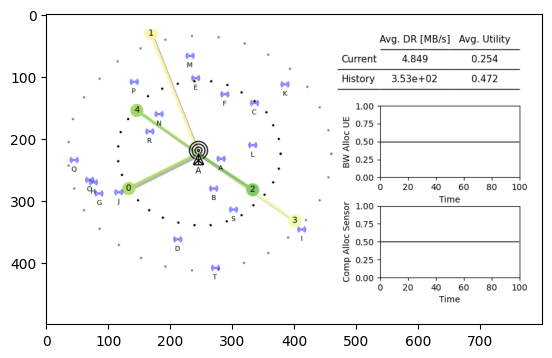

In [7]:
from IPython import display

done = False
obs, info = env.reset()

for step in range(100):
    # here, use random dummy actions by sampling from the action space
    #dummy_action = env.action_space.sample()
    dummy_action = (0.5, 0.5)
    obs, reward, terminated, truncated, info = env.step(dummy_action)

    # render the environment
    plt.imshow(env.render())
    display.display(plt.gcf())
    display.clear_output(wait=True) 
    
plt.close()

In [8]:
# load all tracked results as pandas data frames
scalar_results, kpi_results, ue_results, bs_results, ss_results = env.monitor.load_results()

# show general results
scalar_results

number UE connections  number sensor conncections  \
Time Step                                                      
0                              5                          20   
1                              5                          20   
2                              5                          20   
3                              5                          20   
4                              5                          20   
...                          ...                         ...   
95                             5                          20   
96                             5                          20   
97                             5                          20   
98                             5                          20   
99                             5                          20   

           total traffic request ue  total traffic request sensor  \
Time Step                                                           
0                         26.190024                     85.239820   
1                         52.080804                    162.479641   
2                         89.729814                    242.933372   
3                        113.079288                    326.387103   
4                        146.045029                    386.840833   
...                             ...                           ...   
95                       797.285692                   6314.130343   
96                       807.610166                   6389.584074   
97                       822.961556                   6450.037805   
98                       822.469799                   6504.491536   
99                       848.896549                   6559.945267   

           delayed UE packets  delayed sensor packets  mean utility  \
Time Step                                                             
0                           0                       0      0.131099   
1                           0                       0      0.144617   
2                           0                       0      0.154780   
3                           0                       0      0.171670   
4                           1                       0      0.185817   
...                       ...                     ...           ...   
95                          0                       5      0.299618   
96                          1                       6      0.285305   
97                          1                       3      0.274931   
98                          1                       5      0.261200   
99                          1                       4      0.254376   

           mean utility sensor  mean datarate  mean datarate sensor  
Time Step                                                            
0                     0.042077       3.770654              6.335192  
1                     0.042077       4.165098              6.335192  
2                     0.042077       4.401871              6.335192  
3                     0.042077       5.114070              6.335192  
4                     0.042077       5.721509              6.335192  
...                        ...            ...                   ...  
95                    0.042077       6.640229              6.335192  
96                    0.042077       5.968895              6.335192  
97                    0.042077       5.596715              6.335192  
98                    0.042077       5.115696              6.335192  
99                    0.042077       4.849088              6.335192  

[100 rows x 10 columns]

In [9]:
kpi_results

bw allocation UE  bw allocation sensor  comp. allocation UE  \
Time Step                                                                
0                       0.5                   0.5                  0.5   
1                       0.5                   0.5                  0.5   
2                       0.5                   0.5                  0.5   
3                       0.5                   0.5                  0.5   
4                       0.5                   0.5                  0.5   
...                     ...                   ...                  ...   
95                      0.5                   0.5                  0.5   
96                      0.5                   0.5                  0.5   
97                      0.5                   0.5                  0.5   
98                      0.5                   0.5                  0.5   
99                      0.5                   0.5                  0.5   

           comp. allocation sensor  delayed packets  reward at timestep  \
Time Step                                                                 
0                              0.5                0               10.00   
1                              0.5                0               10.00   
2                              0.5                0                0.00   
3                              0.5                0               18.57   
4                              0.5                1               -5.00   
...                            ...              ...                 ...   
95                             0.5                0               20.00   
96                             0.5                1                5.00   
97                             0.5                1                5.00   
98                             0.5                1                5.00   
99                             0.5                1                5.00   

           reward cumulative  total aori  total aosi  total throughput ue  \
Time Step                                                                   
0                      10.00         0.0         0.0            13.809976   
1                      20.00         0.0         0.0            12.109220   
2                      20.00         0.0         0.0             5.350990   
3                      38.57         3.0         3.0            17.650526   
4                      33.57         4.0         4.0             6.034259   
...                      ...         ...         ...                  ...   
95                   1037.43         0.0         0.0            20.865651   
96                   1042.43        80.0        80.0            11.675526   
97                   1047.43        25.0        25.0            14.648610   
98                   1052.43        81.0        81.0            17.491757   
99                   1057.43        13.0        13.0            17.573250   

           total throughput sensor  
Time Step                           
0                        32.760180  
1                        35.760180  
2                        34.546269  
3                        36.546269  
4                        36.546269  
...                            ...  
95                       37.546269  
96                       31.546269  
97                       32.546269  
98                       33.546269  
99                       32.546269  

[100 rows x 11 columns]

In [10]:
ue_results

Metric           AoRI  AoSI  distance UE-station  traffic request  \
Time Step UE ID                                                     
0         0       NaN   NaN            99.946785     6.203310e+00   
          1       0.0   0.0            43.472946     0.000000e+00   
          2       NaN   NaN           101.735100     9.227551e+00   
          3       NaN   NaN            75.488173     5.871786e+00   
          4       NaN   NaN            92.039596     4.887377e+00   
...               ...   ...                  ...              ...   
99        0       NaN   NaN            56.554186     5.497811e+02   
          1       NaN   NaN           104.867118     1.920481e+02   
          2       0.0   0.0            47.216607     2.131628e-14   
          3      13.0  13.0            86.227001     1.070673e+02   
          4       NaN   NaN            54.824342     0.000000e+00   

Metric           user datarate  user queue size  user throughput  user utility  
Time Step UE ID                                                                 
0         0           0.796690              1.0         0.796690     -0.049355  
          1          14.043294              0.0         9.000000      0.573734  
          2           0.772449              1.0         0.772449     -0.056065  
          3           2.128214              1.0         2.128214      0.164008  
          4           1.112623              1.0         1.112623      0.023174  
...                        ...              ...              ...           ...  
99        0           5.500562             56.0         5.500562      0.370204  
          1           0.717739             17.0         0.717739     -0.072017  
          2          10.362730              0.0        10.000000      0.507737  
          3           1.354948             11.0         1.354948      0.065961  
          4           6.309463              0.0         0.000000      0.399996  

[500 rows x 8 columns]

In [11]:
ss_results

Metric               distance sensor-station  sensor datarate  \
Time Step Sensor ID                                             
0         0                        16.492423        90.297113   
          1                        30.083218        11.860458   
          2                        57.280014         1.347652   
          3                        70.611614         0.664789   
          4                        61.032778         1.087684   
...                                      ...              ...   
99        15                       74.027022         0.566766   
          16                       89.140339         0.302636   
          17                       39.357337         4.786090   
          18                       51.478151         1.932911   
          19                       92.779308         0.264384   

Metric               sensor queue size  sensor throughput  sensor utility  \
Time Step Sensor ID                                                         
0         0                        0.0           5.000000        0.977837   
          1                        0.0           6.000000        0.537051   
          2                        1.0           1.347652        0.064789   
          3                        1.0           0.664789       -0.088658   
          4                        1.0           1.087684        0.018251   
...                                ...                ...             ...   
99        15                      91.0           0.566766       -0.123298   
          16                      95.0           0.302636       -0.259540   
          17                       5.0           4.786090        0.339990   
          18                      62.0           1.932911        0.143106   
          19                      92.0           0.264384       -0.288882   

Metric               traffic request  
Time Step Sensor ID                   
0         0                 0.000000  
          1                 0.000000  
          2                 7.652348  
          3                 6.335211  
          4                 0.912316  
...                              ...  
99        15              463.323372  
          16              473.736437  
          17               18.963227  
          18              273.708932  
          19              485.561586  

[2000 rows x 6 columns]

In [12]:
bs_results

Metric           queue size accomplished UE jobs  \
Time Step BS ID                                    
0         0                                    1   
1         0                                    2   
2         0                                    2   
3         0                                    4   
4         0                                    5   
...                                          ...   
95        0                                  263   
96        0                                  265   
97        0                                  267   
98        0                                  269   
99        0                                  271   

Metric           queue size accomplished sensor jobs  \
Time Step BS ID                                        
0         0                                        3   
1         0                                        8   
2         0                                       14   
3         0                                       18   
4         0                                       22   
...                                              ...   
95        0                                      640   
96        0                                      648   
97        0                                      653   
98        0                                      660   
99        0                                      666   

Metric           queue size transferred UE jobs  \
Time Step BS ID                                   
0         0                                   0   
1         0                                   0   
2         0                                   0   
3         0                                   0   
4         0                                   0   
...                                         ...   
95        0                                   0   
96        0                                   0   
97        0                                   0   
98        0                                   0   
99        0                                   0   

Metric           queue size transferred sensor jobs  
Time Step BS ID                                      
0         0                                       0  
1         0                                       0  
2         0                                       0  
3         0                                       0  
4         0                                       0  
...                                             ...  
95        0                                       0  
96        0                                       0  
97        0                                       0  
98        0                                       0  
99        0                                       0  

[100 rows x 4 columns]

In [13]:
data = kpi_results.agg(['mean', 'min', 'max'])
data

bw allocation UE  bw allocation sensor  comp. allocation UE  \
mean               0.5                   0.5                  0.5   
min                0.5                   0.5                  0.5   
max                0.5                   0.5                  0.5   

      comp. allocation sensor  delayed packets  reward at timestep  \
mean                      0.5             1.07             10.5741   
min                       0.5             0.00            -20.0000   
max                       0.5             4.00             49.0000   

      reward cumulative  total aori  total aosi  total throughput ue  \
mean           406.6802        22.4        22.4            26.391035   
min             10.0000         0.0         0.0             5.350990   
max           1057.4300        81.0        81.0            68.532806   

      total throughput sensor  
mean                34.360547  
min                 28.546269  
max                 40.546269

In [14]:
data = ue_results.reset_index()
data = data.groupby('UE ID').agg(['mean', 'min', 'max'])
data = data.drop('Time Step', axis='columns')
data

Metric       AoRI                  AoSI            distance UE-station  \
             mean  min   max       mean  min   max                mean   
UE ID                                                                    
0       58.111111  8.0  81.0  58.111111  8.0  81.0           81.330213   
1        2.160000  0.0  25.0   2.160000  0.0  25.0           47.964568   
2        9.053571  0.0  52.0   9.053571  0.0  52.0           43.210365   
3        3.767857  0.0  17.0   3.767857  0.0  17.0           51.769772   
4        6.032787  0.0  27.0   6.032787  0.0  27.0           46.767755   

Metric                        traffic request  ... user datarate  \
              min         max            mean  ...           max   
UE ID                                          ...                 
0       56.554186   99.946785      348.106442  ...      5.500562   
1       13.257969  106.225573       31.929660  ...    997.910696   
2        5.406402  101.735100       39.776525  ...  35363.225002   
3       31.935622   86.227001       22.765266  ...     43.400348   
4       26.218494   92.039596       36.966143  ...     88.640581   

Metric user queue size            user throughput                      \
                  mean  min   max            mean      min        max   
UE ID                                                                   
0                34.03  1.0  56.0        2.092189  0.79669   5.500562   
1                 3.10  0.0  17.0        5.289519  0.00000  16.000000   
2                 4.52  0.0  17.0        6.630000  0.00000  31.197235   
3                 2.75  0.0  11.0        5.549327  0.00000  16.525426   
4                 3.57  0.0  12.0        6.830000  0.00000  26.630011   

Metric user utility                      
               mean       min       max  
UE ID                                    
0          0.114514 -0.049355  0.370204  
1          0.574129 -0.080981  1.000000  
2          0.613560 -0.056065  1.000000  
3          0.481502  0.065961  0.818747  
4          0.577690  0.023174  0.973816  

[5 rows x 24 columns]

In [15]:
data = ss_results.reset_index()
data = data.groupby('Sensor ID').agg(['mean', 'min', 'max'])
data = data.drop('Time Step', axis='columns')
data

Metric    distance sensor-station                       sensor datarate  \
                             mean        min        max            mean   
Sensor ID                                                                 
0                       16.492423  16.492423  16.492423       90.297113   
1                       30.083218  30.083218  30.083218       11.860458   
2                       57.280014  57.280014  57.280014        1.347652   
3                       70.611614  70.611614  70.611614        0.664789   
4                       61.032778  61.032778  61.032778        1.087684   
5                       51.623638  51.623638  51.623638        1.914575   
6                       77.878110  77.878110  77.878110        0.477553   
7                       78.447435  78.447435  78.447435        0.465949   
8                       95.900991  95.900991  95.900991        0.236428   
9                       64.884513  64.884513  64.884513        0.884595   
10                      83.546394  83.546394  83.546394        0.376683   
11                      39.623226  39.623226  39.623226        4.678489   
12                      79.227520  79.227520  79.227520        0.450635   
13                      42.520583  42.520583  42.520583        3.686356   
14                      80.777472  80.777472  80.777472        0.422094   
15                      74.027022  74.027022  74.027022        0.566766   
16                      89.140339  89.140339  89.140339        0.302636   
17                      39.357337  39.357337  39.357337        4.786090   
18                      51.478151  51.478151  51.478151        1.932911   
19                      92.779308  92.779308  92.779308        0.264384   

Metric                          sensor queue size             \
                 min        max              mean  min   max   
Sensor ID                                                      
0          90.297113  90.297113              0.00  0.0   0.0   
1          11.860458  11.860458              0.00  0.0   0.0   
2           1.347652   1.347652             38.33  1.0  75.0   
3           0.664789   0.664789             46.97  1.0  90.0   
4           1.087684   1.087684             39.91  1.0  81.0   
5           1.914575   1.914575             33.09  1.0  65.0   
6           0.477553   0.477553             46.52  1.0  92.0   
7           0.465949   0.465949             46.61  1.0  92.0   
8           0.236428   0.236428             48.84  1.0  96.0   
9           0.884595   0.884595             43.35  1.0  85.0   
10          0.376683   0.376683             46.76  1.0  92.0   
11          4.678489   4.678489              6.39  1.0  11.0   
12          0.450635   0.450635             46.33  1.0  91.0   
13          3.686356   3.686356             13.22  1.0  28.0   
14          0.422094   0.422094             47.66  1.0  93.0   
15          0.566766   0.566766             46.74  1.0  91.0   
16          0.302636   0.302636             48.08  1.0  95.0   
17          4.786090   4.786090              3.89  0.0   7.0   
18          1.932911   1.932911             31.19  1.0  62.0   
19          0.264384   0.264384             46.13  1.0  92.0   

Metric    sensor throughput                      sensor utility            \
                       mean       min        max           mean       min   
Sensor ID                                                                   
0                  5.110000  1.000000  10.000000       0.977837  0.977837   
1                  4.740000  1.000000   9.000000       0.537051  0.537051   
2                  1.347652  1.347652   1.347652       0.064789  0.064789   
3                  0.664789  0.664789   0.664789      -0.088658 -0.088658   
4                  1.087684  1.087684   1.087684       0.018251  0.018251   
5                  1.914575  1.914575   1.914575       0.141036  0.141036   
6                  0.477553  0.477553   0.477553      -0.160489 -0.160489   
7                  0.465949  0.

In [16]:
data = bs_results.reset_index()
data = data.groupby('BS ID').agg(['mean', 'min', 'max'])
data = data.drop('Time Step', axis='columns')
data

Metric queue size accomplished UE jobs           \
                                  mean min  max   
BS ID                                             
0                               134.46   1  271   

Metric queue size accomplished sensor jobs           \
                                      mean min  max   
BS ID                                                 
0                                   329.92   3  666   

Metric queue size transferred UE jobs          \
                                 mean min max   
BS ID                                           
0                                1.17   0  15   

Metric queue size transferred sensor jobs          
                                     mean min max  
BS ID                                              
0                                    0.07   0   2

In [17]:
data = scalar_results.agg(['min', 'max', 'mean'])
data

number UE connections  number sensor conncections  \
min                     5.0                        20.0   
max                     5.0                        20.0   
mean                    5.0                        20.0   

      total traffic request ue  total traffic request sensor  \
min                  26.190024                     85.239820   
max                 848.896549                   6559.945267   
mean                479.544035                   3375.887728   

      delayed UE packets  delayed sensor packets  mean utility  \
min                 0.00                     0.0      0.131099   
max                 4.00                     8.0      0.672727   
mean                1.07                     4.2      0.472279   

      mean utility sensor  mean datarate  mean datarate sensor  
min              0.042077       3.770654              6.335192  
max              0.042077    7087.891456              6.335192  
mean             0.042077     353.016246              6.335192

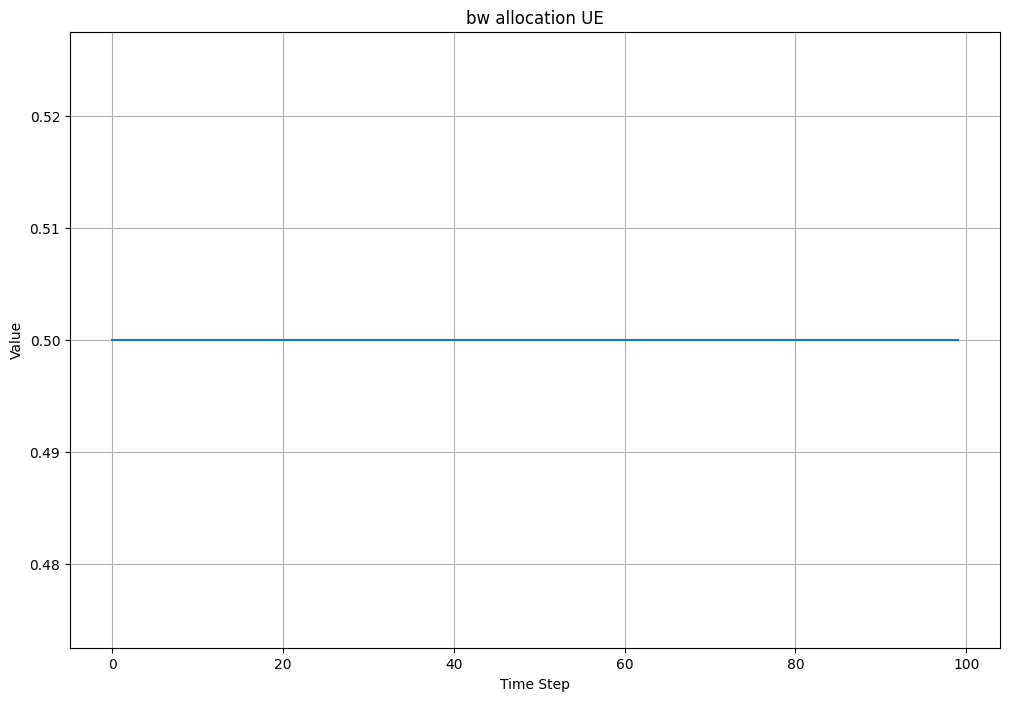

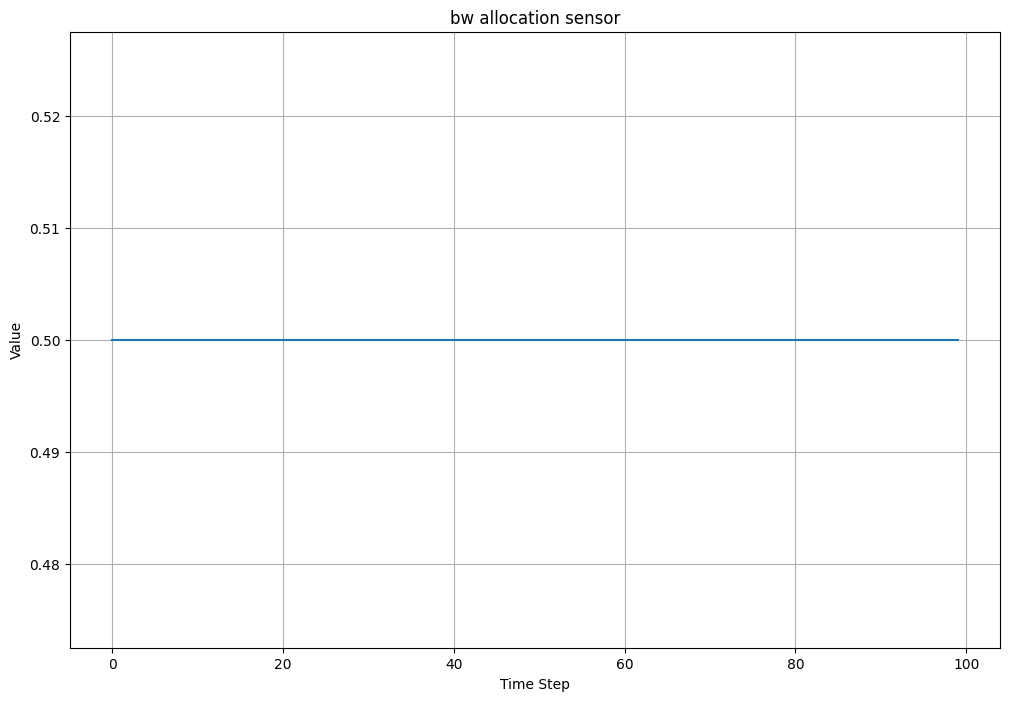

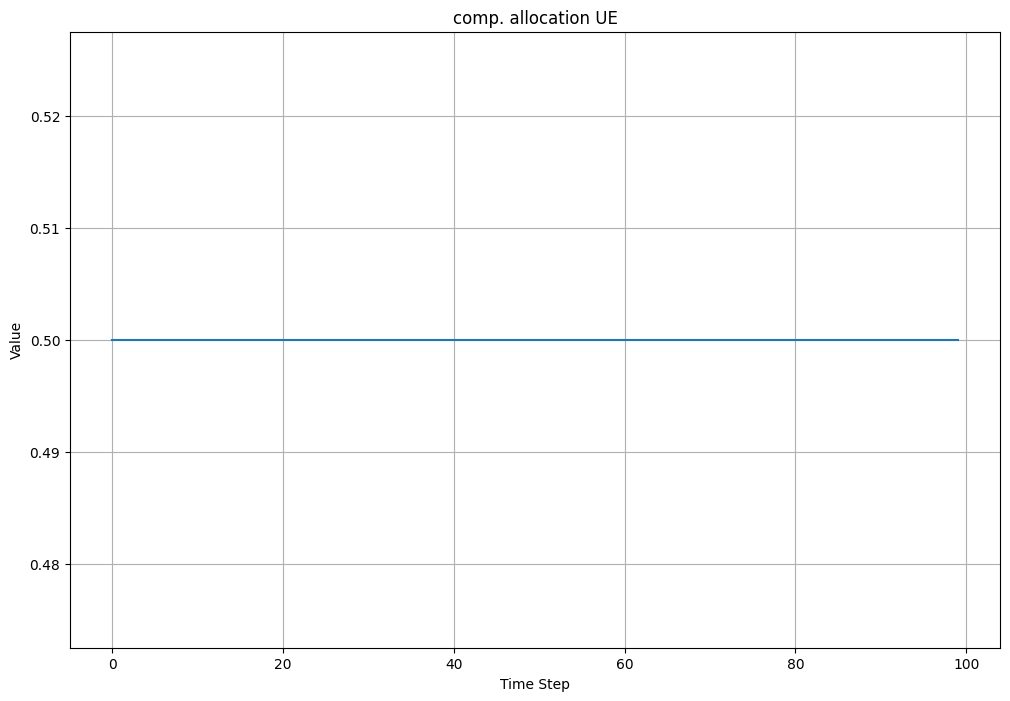

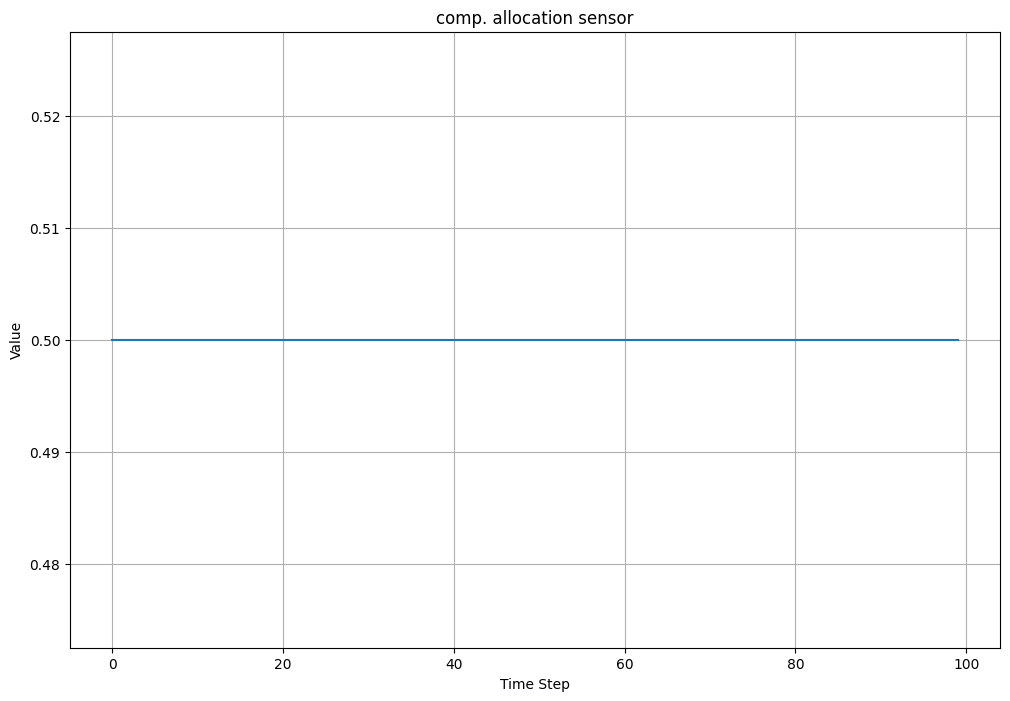

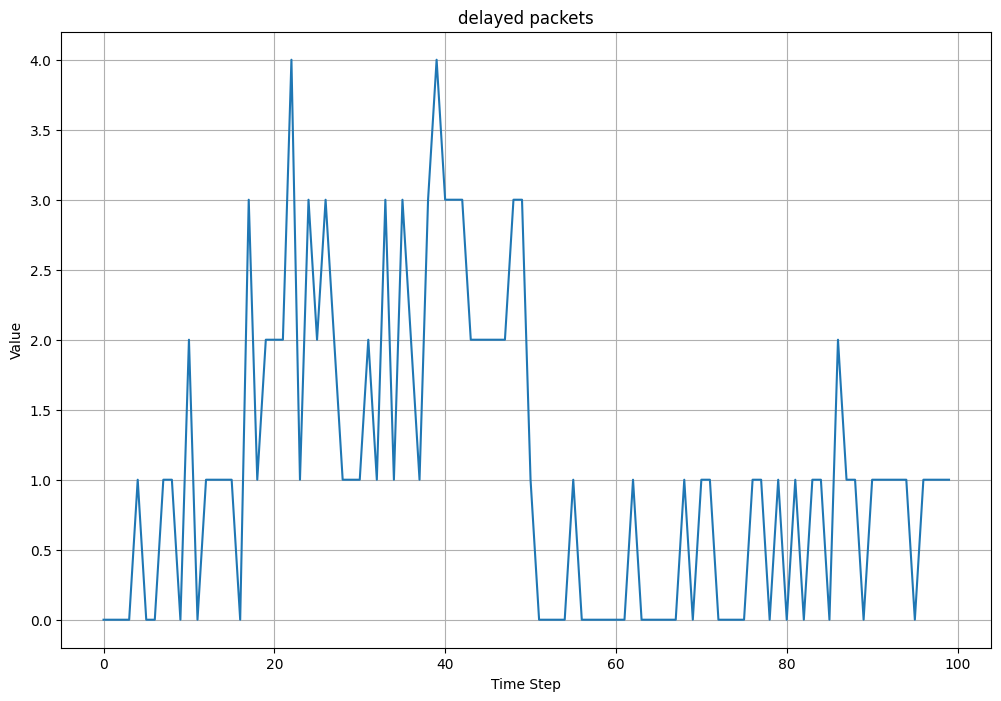

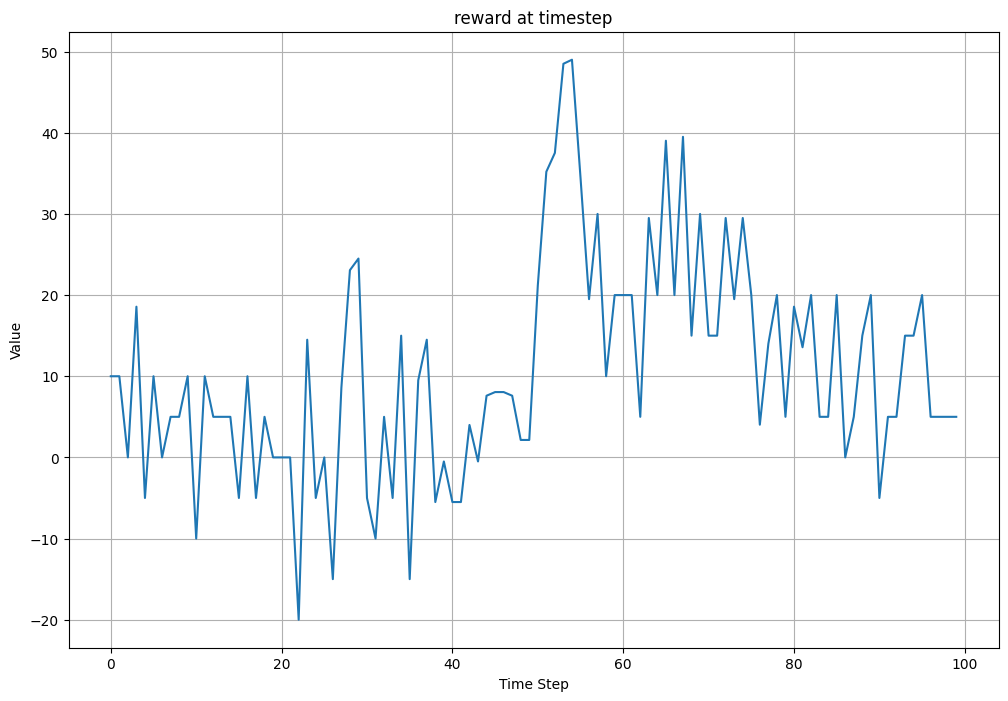

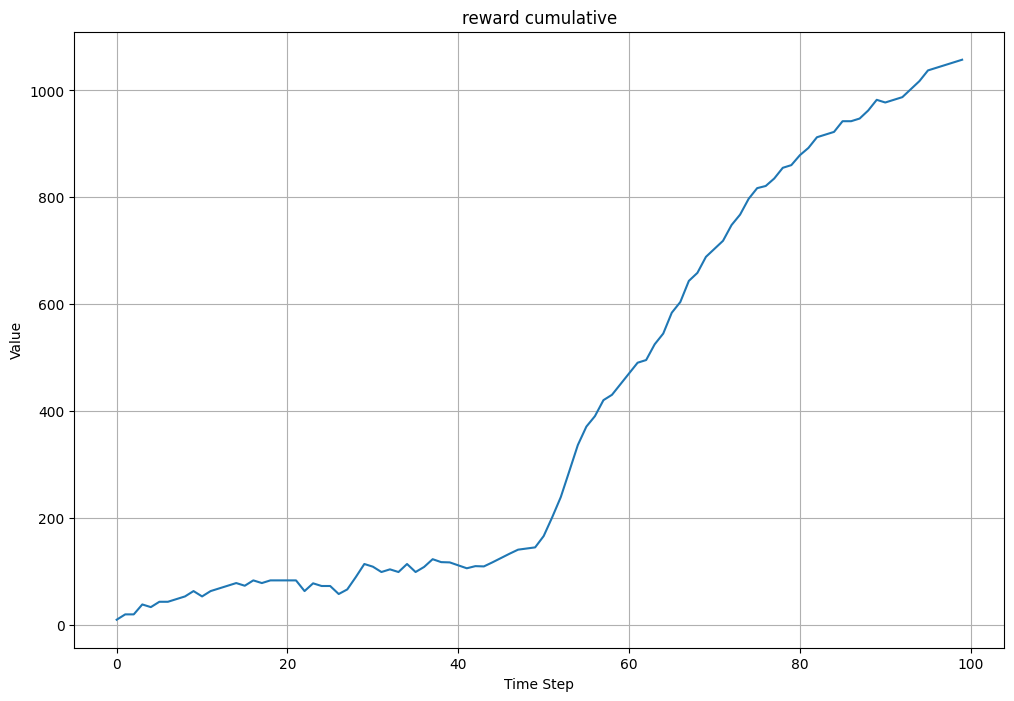

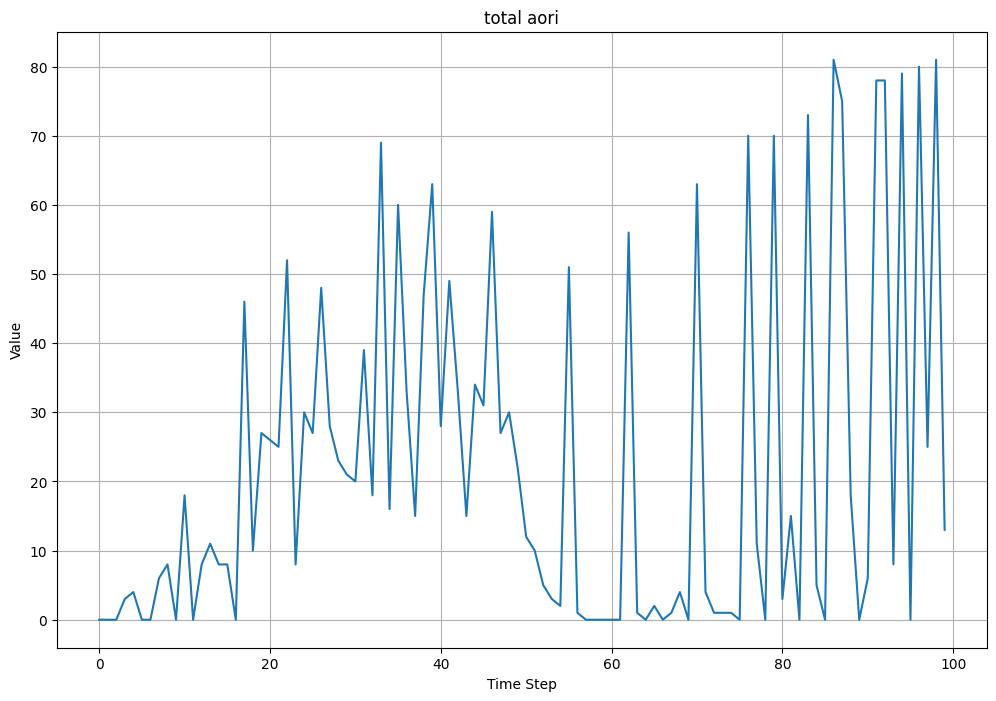

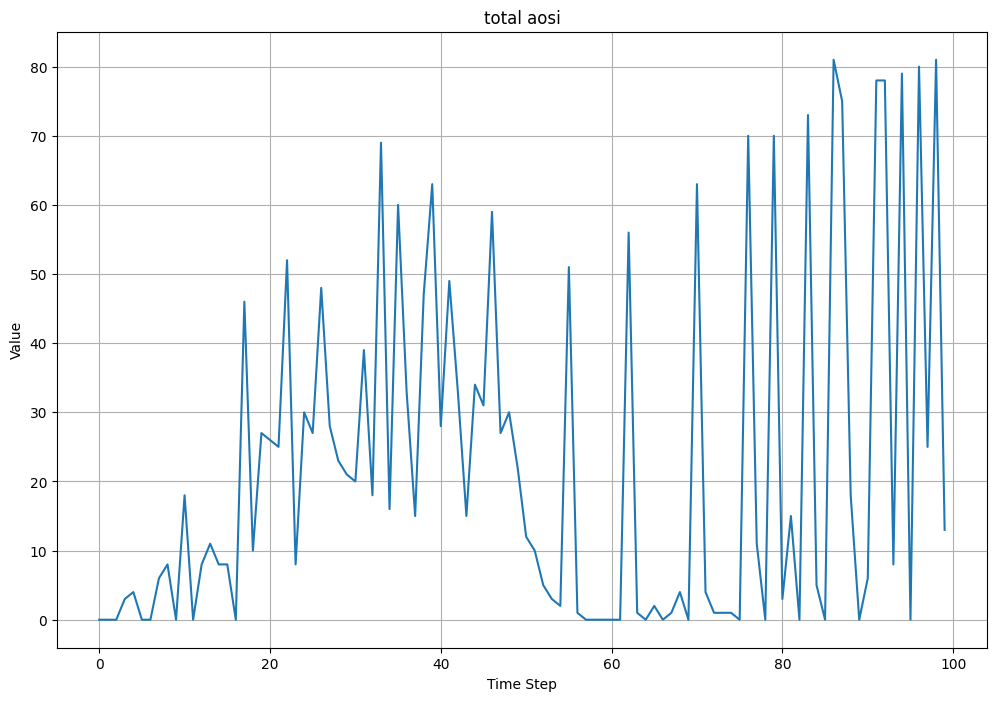

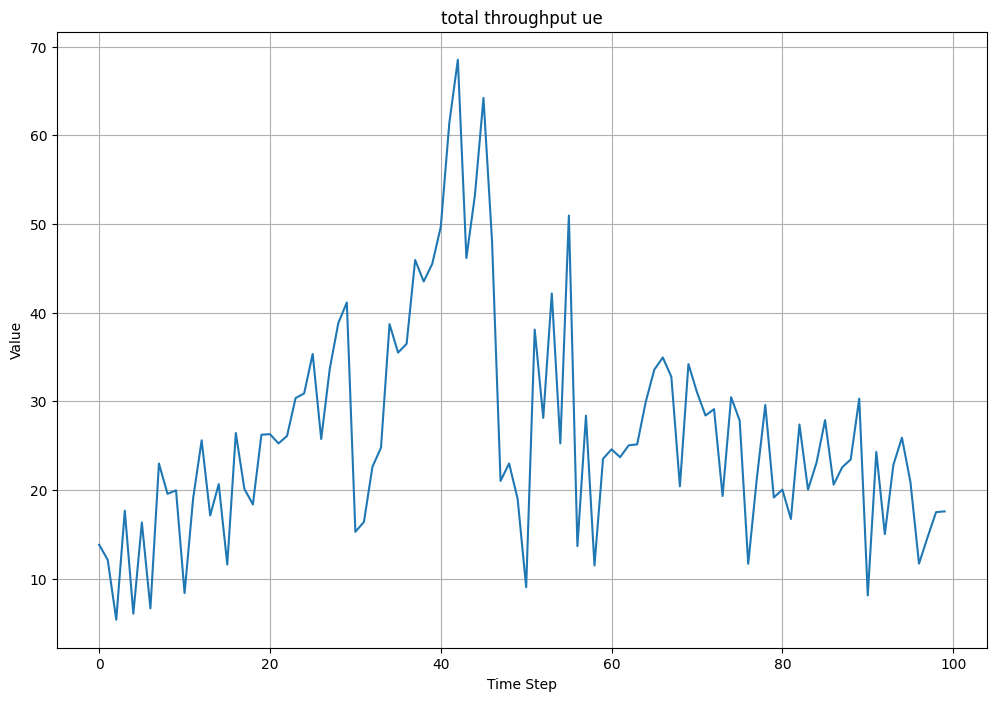

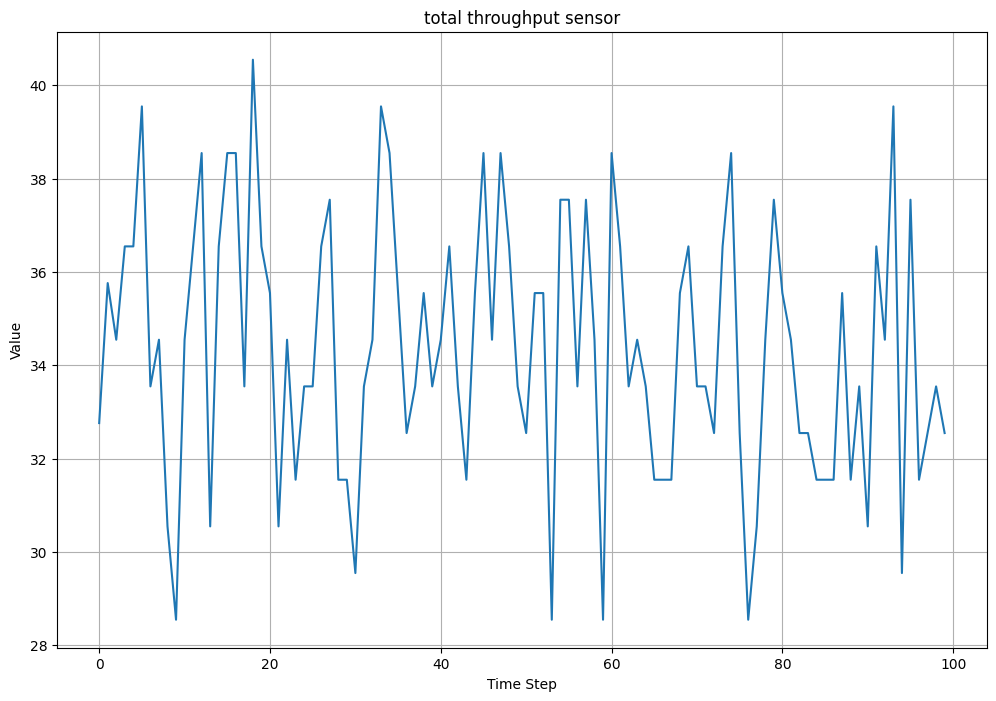

In [18]:
import matplotlib.pyplot as plt

def plot_kpi_metrics():
    # Plot kpi metrics
    for metric in kpi_results.columns:
        plt.figure(figsize=(12, 8))
        kpi_results[metric].plot()
        plt.title(f"{metric}")
        plt.xlabel("Time Step")
        plt.ylabel("Value")
        plt.grid(True)
        plt.show()

plot_kpi_metrics()

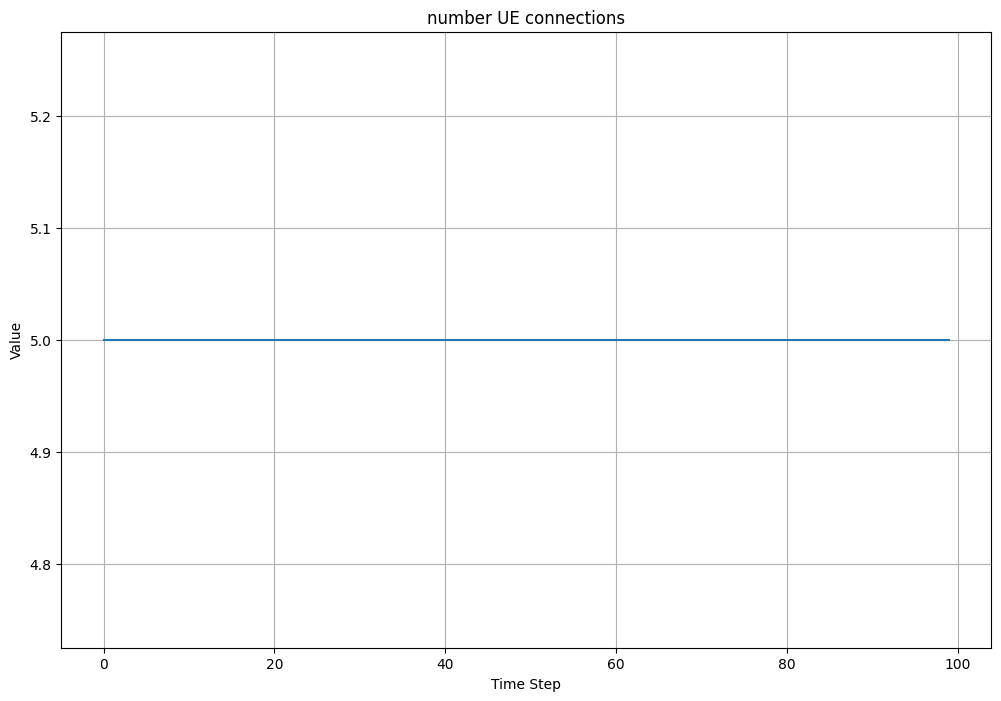

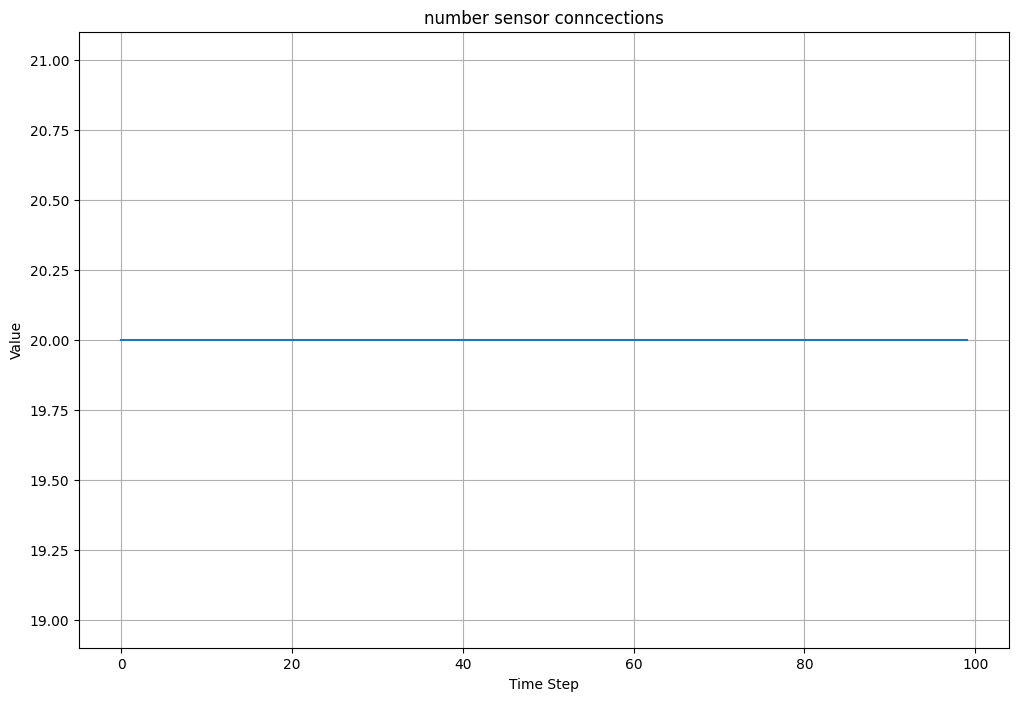

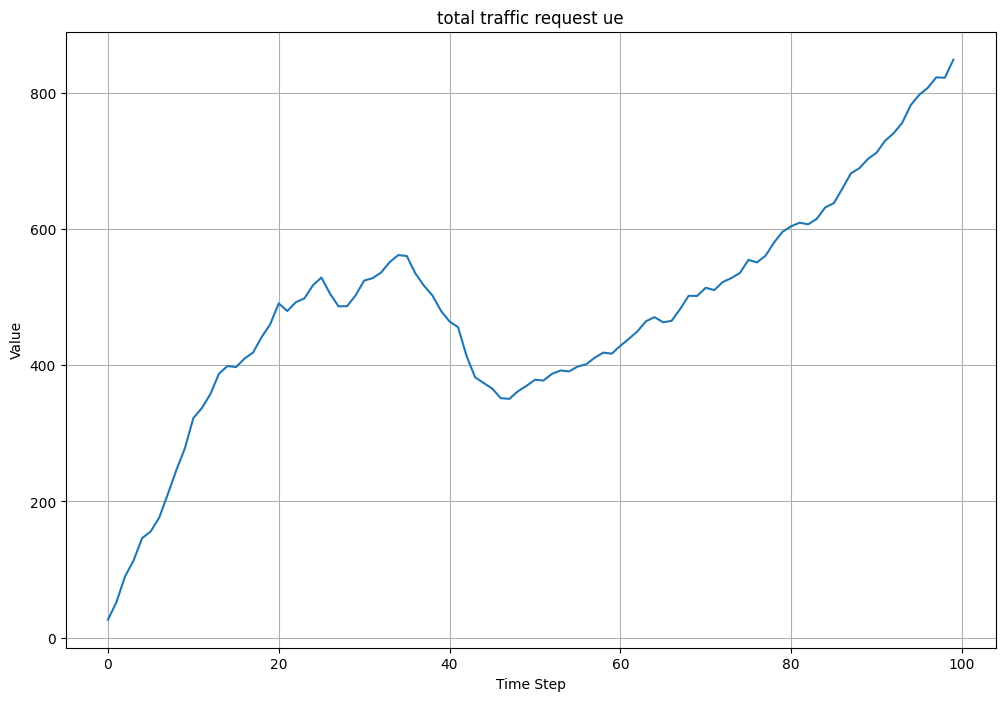

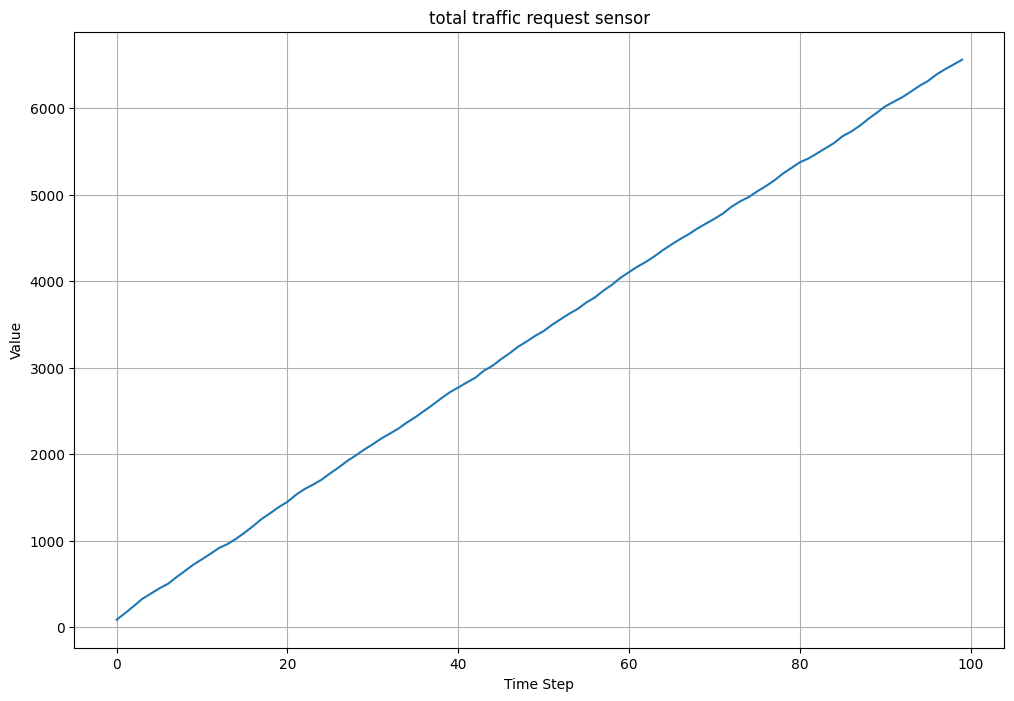

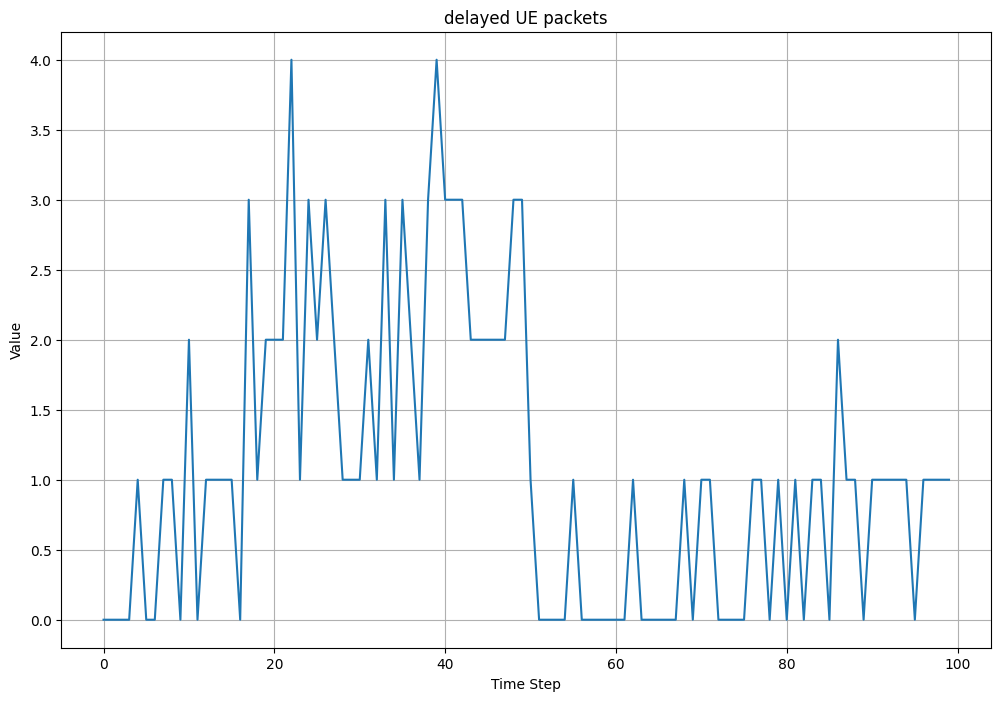

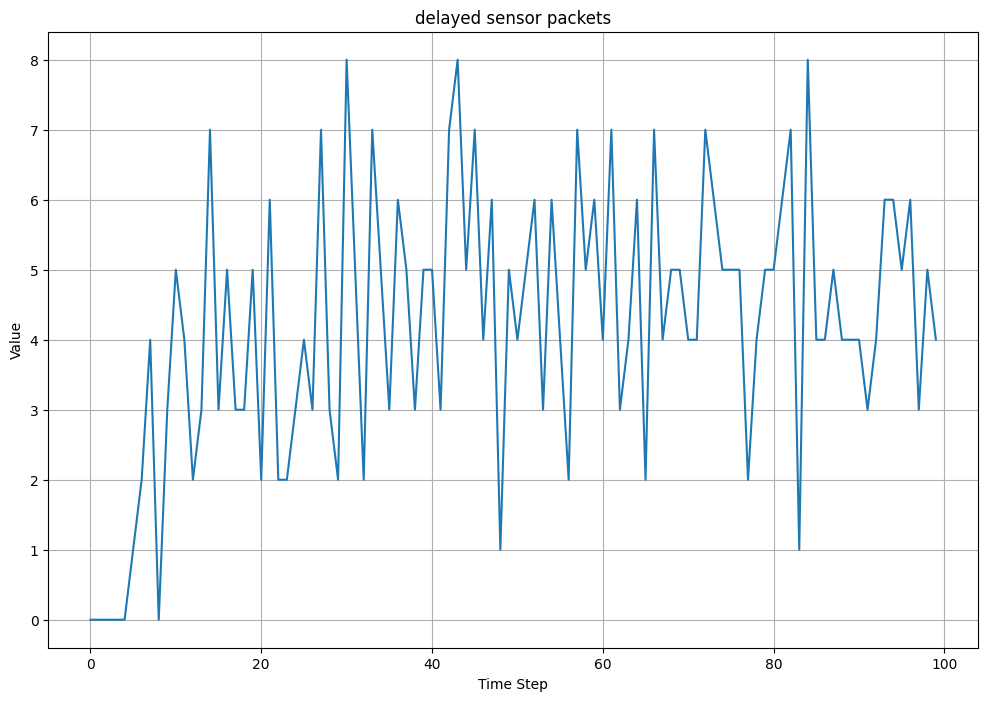

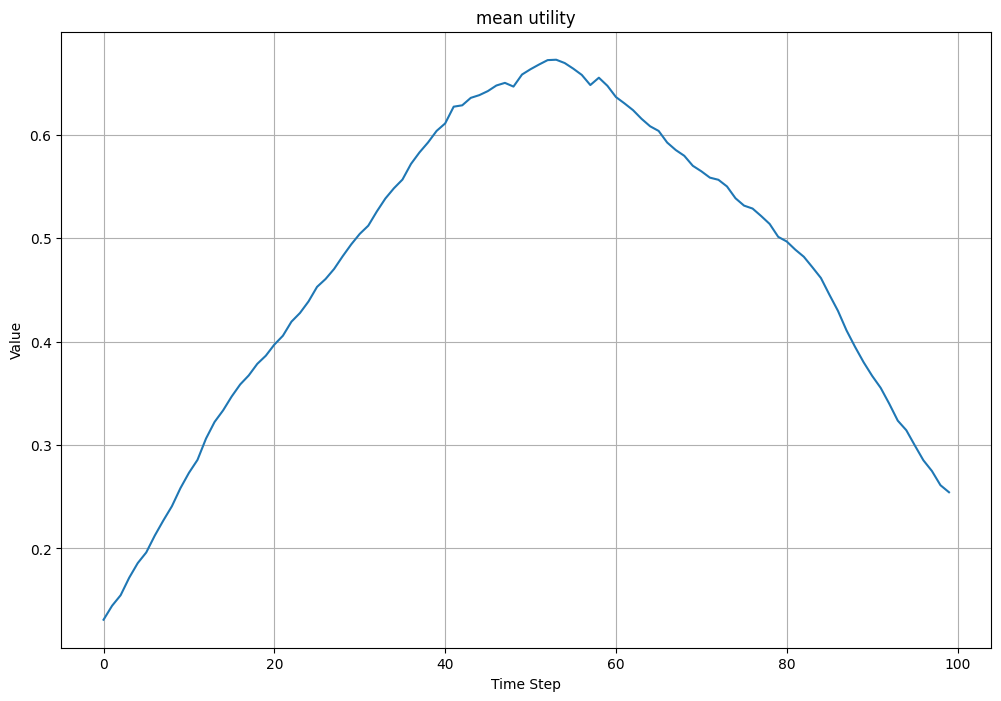

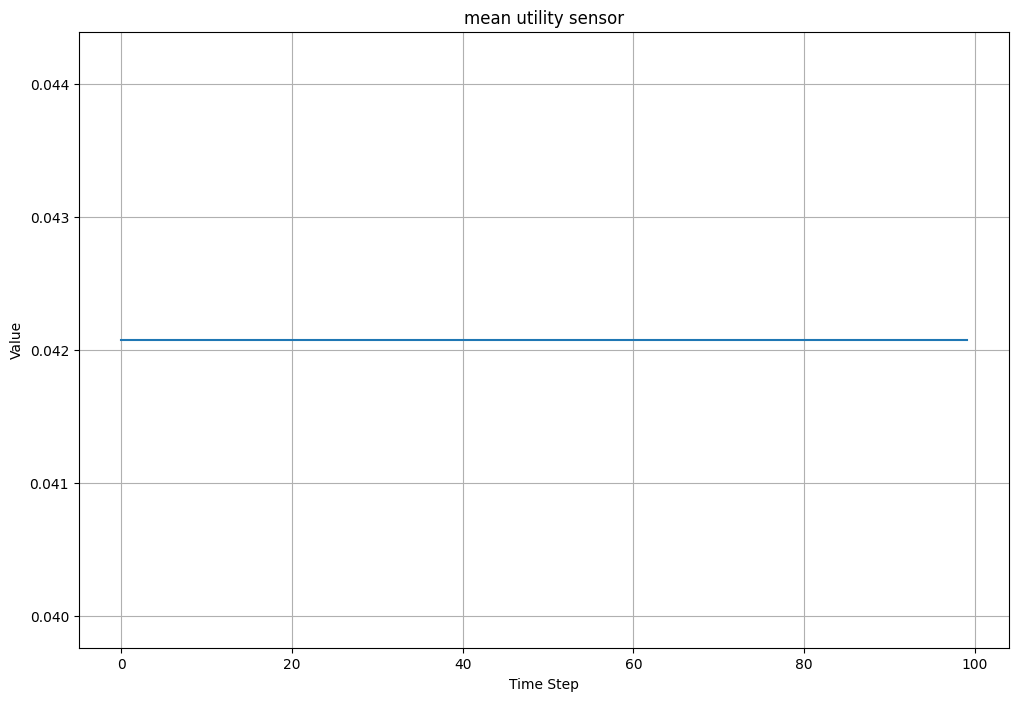

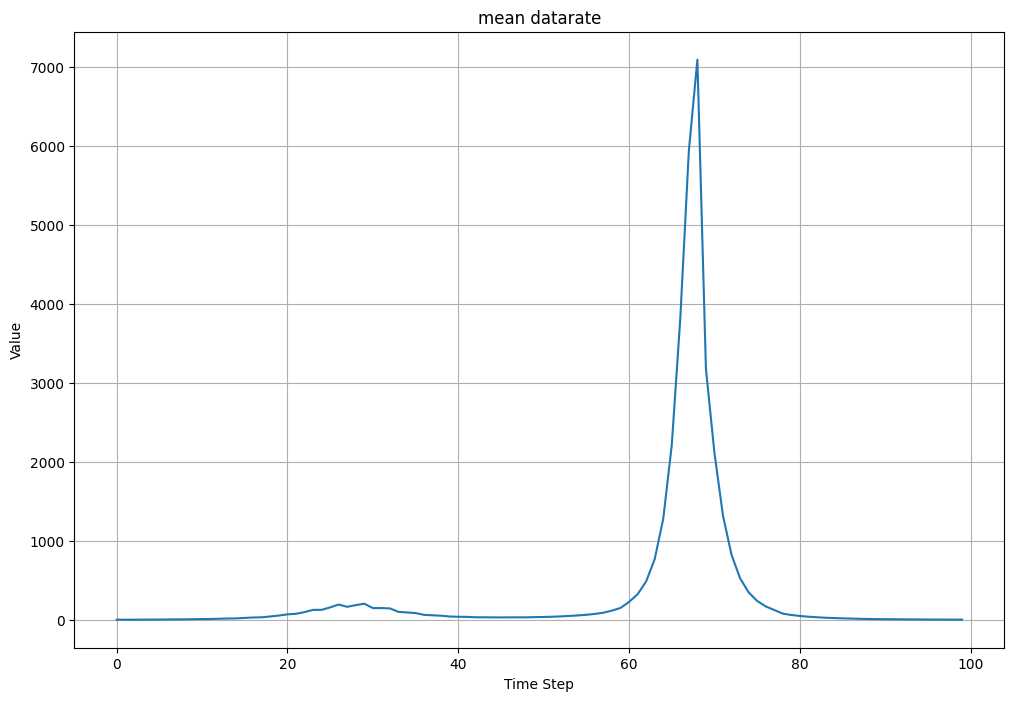

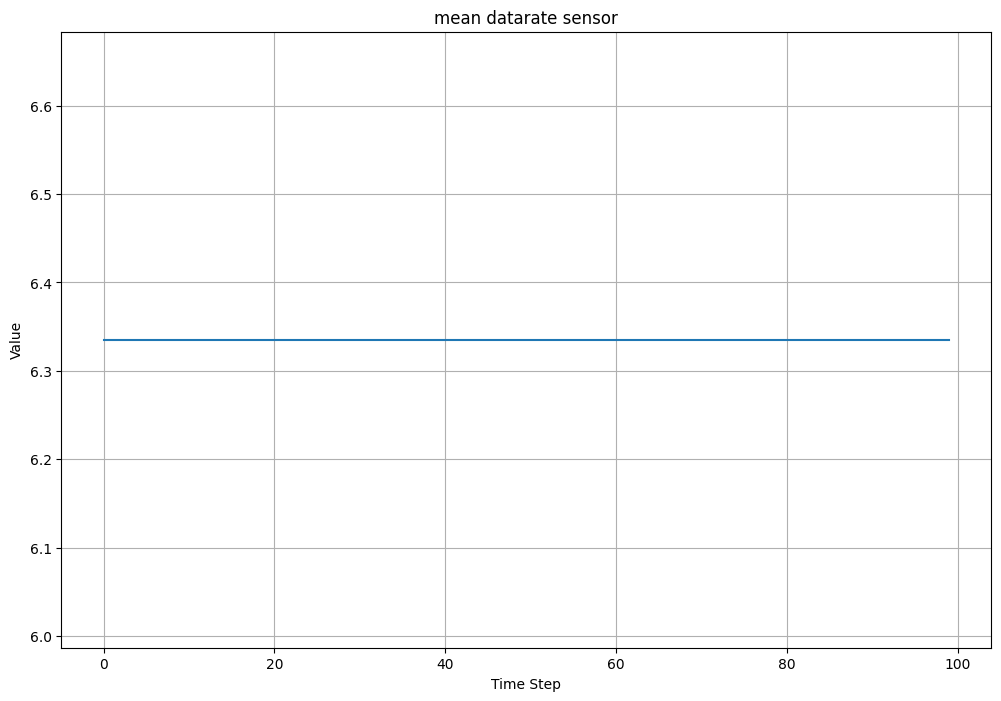

In [19]:
import matplotlib.pyplot as plt

def plot_scalar_metrics():
    # Plot scalar metrics
    for metric in scalar_results.columns:
        plt.figure(figsize=(12, 8))
        scalar_results[metric].plot()
        plt.title(f"{metric}")
        plt.xlabel("Time Step")
        plt.ylabel("Value")
        plt.grid(True)
        plt.show()

plot_scalar_metrics()

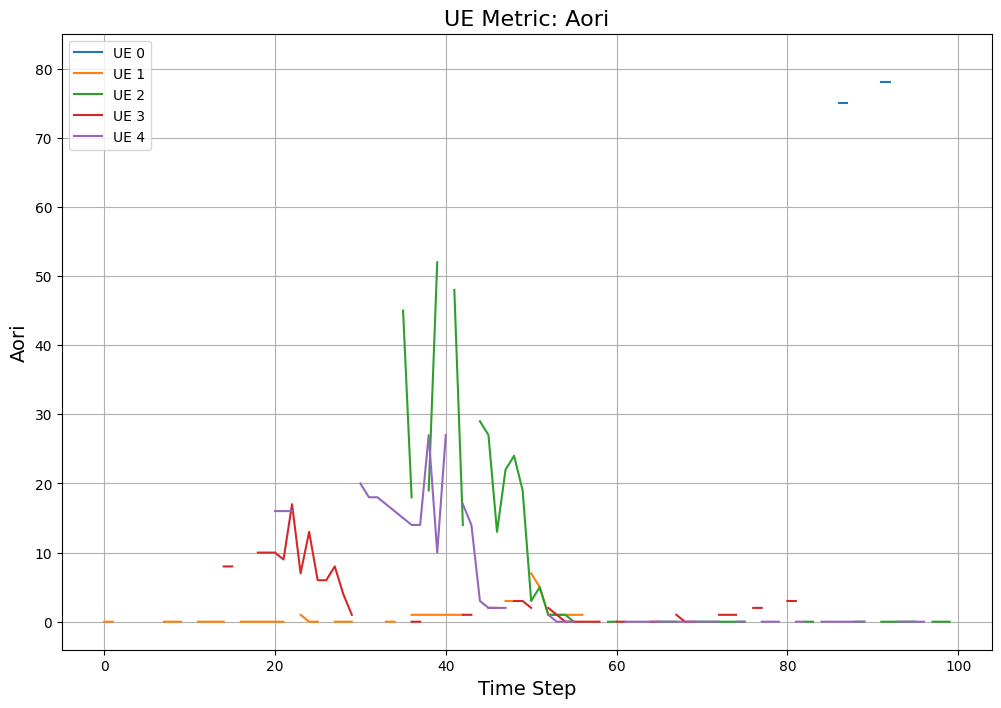

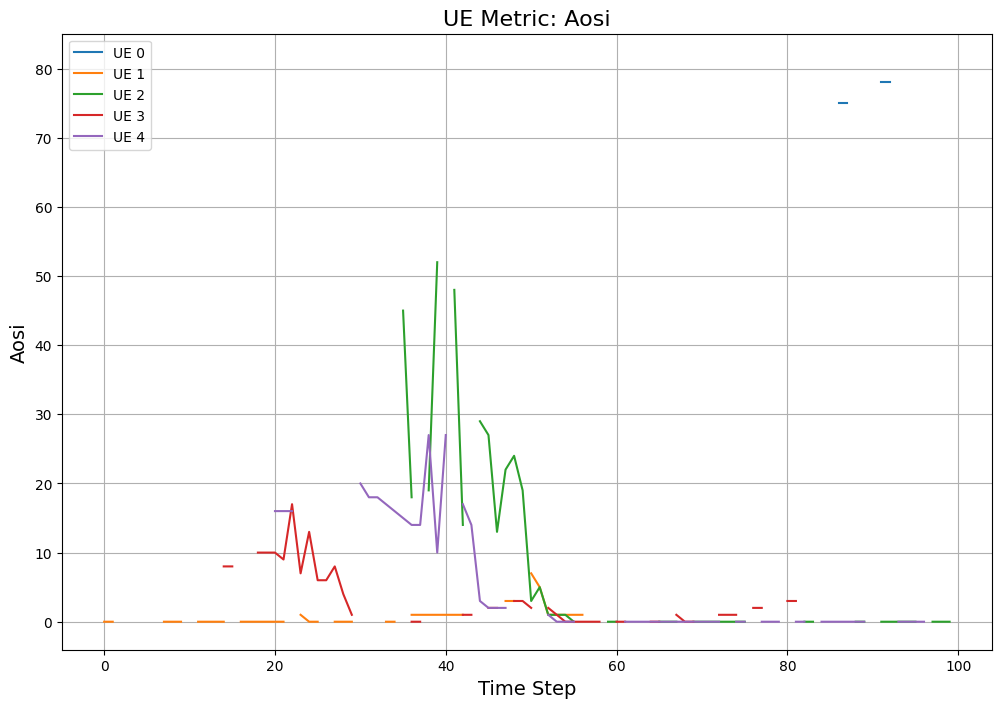

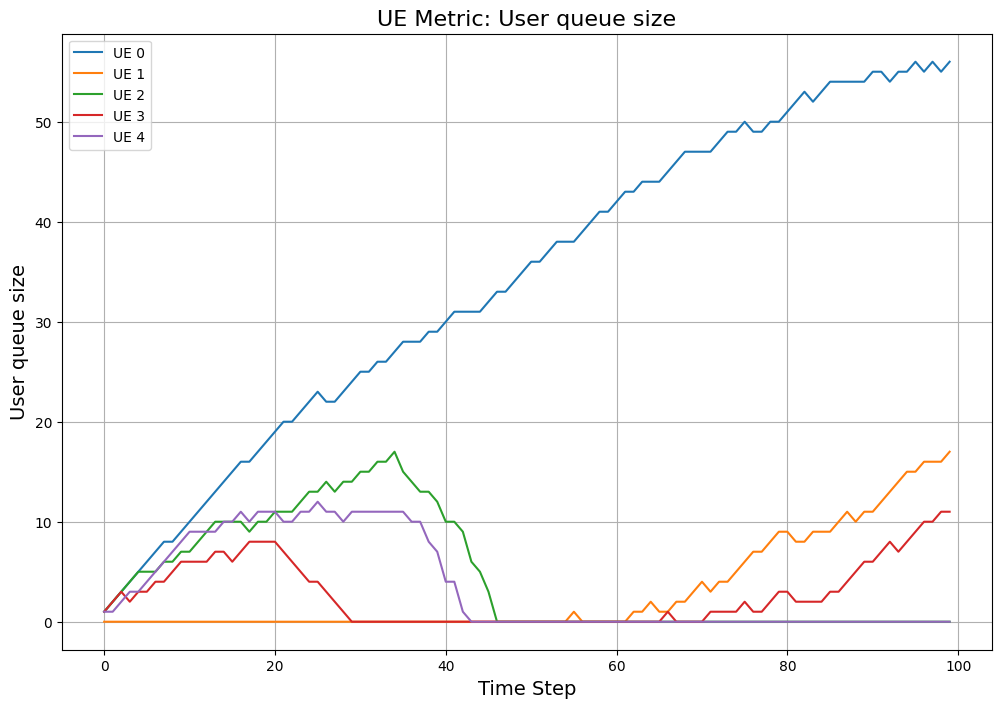

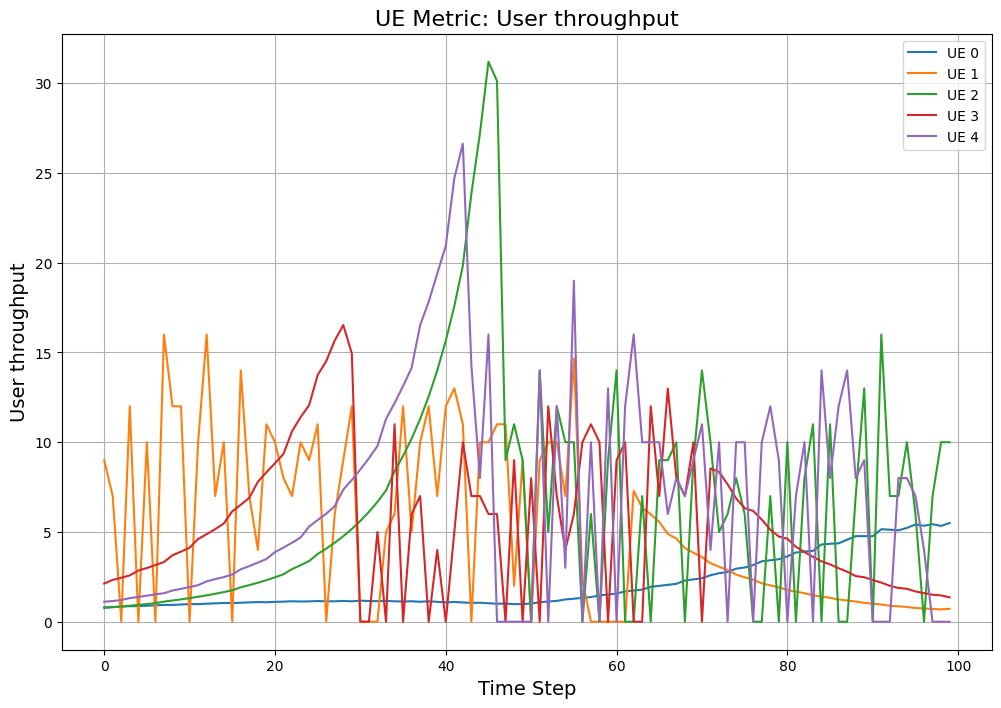

In [20]:
import matplotlib.pyplot as plt

def plot_ue_metrics(ue_results):
    required_metrics = ["user throughput", "user queue size", "AoRI", "AoSI"]
    available_metrics = [metric for metric in ue_results.columns if metric in required_metrics]

    for metric in available_metrics:
        plt.figure(figsize=(12, 8))
        
        for ue_id in ue_results.index.get_level_values("UE ID").unique():
            ue_data = ue_results.xs(ue_id, level="UE ID")[metric]
            plt.plot(ue_data.index, ue_data.values, label=f"UE {ue_id}")
            
        plt.title(f"UE Metric: {metric.capitalize()}", fontsize=16)
        plt.xlabel("Time Step", fontsize=14)
        plt.ylabel(metric.capitalize(), fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

plot_ue_metrics(ue_results)

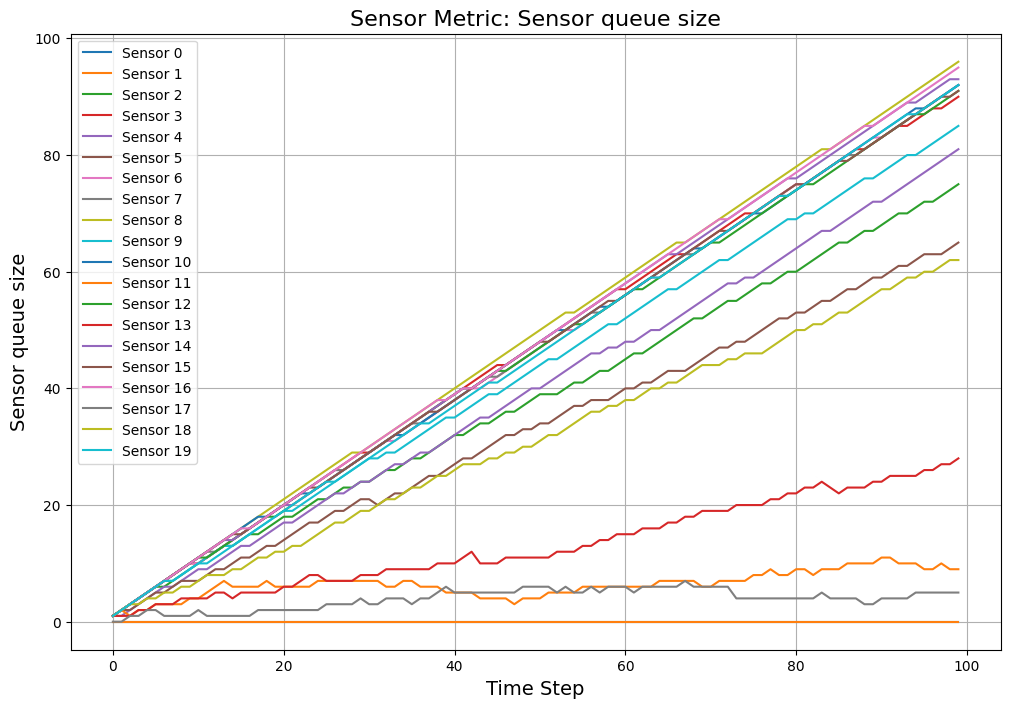

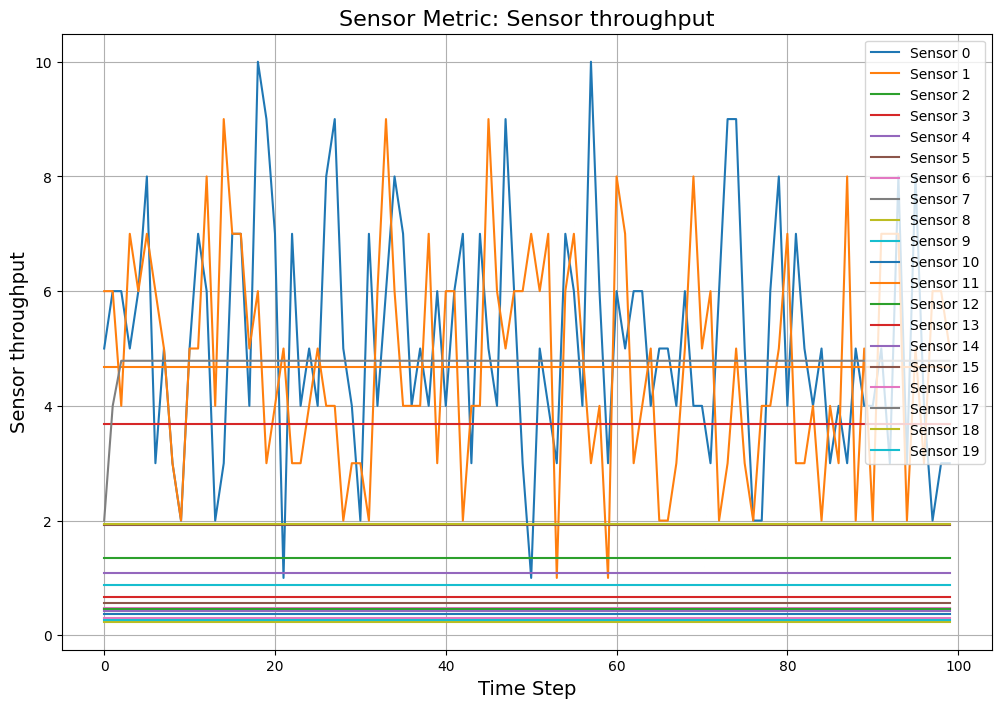

In [21]:
import matplotlib.pyplot as plt

def plot_sensor_metrics(ss_results):
    required_metrics = ["sensor throughput", "sensor queue size"]
    available_metrics = [metric for metric in ss_results.columns if metric in required_metrics]

    for metric in available_metrics:
        plt.figure(figsize=(12, 8))
        
        for sensor_id in ss_results.index.get_level_values("Sensor ID").unique():
            sensor_data = ss_results.xs(sensor_id, level="Sensor ID")[metric]
            plt.plot(sensor_data.index, sensor_data.values, label=f"Sensor {sensor_id}")
        
        plt.title(f"Sensor Metric: {metric.capitalize()}", fontsize=16)
        plt.xlabel("Time Step", fontsize=14)
        plt.ylabel(metric.capitalize(), fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

plot_sensor_metrics(ss_results)

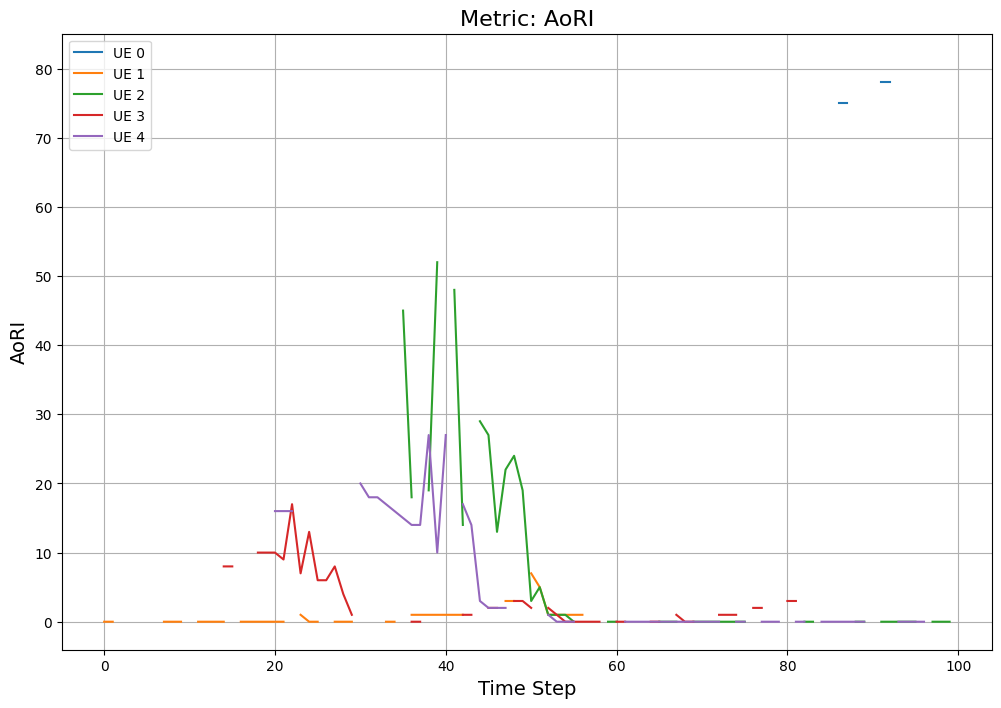

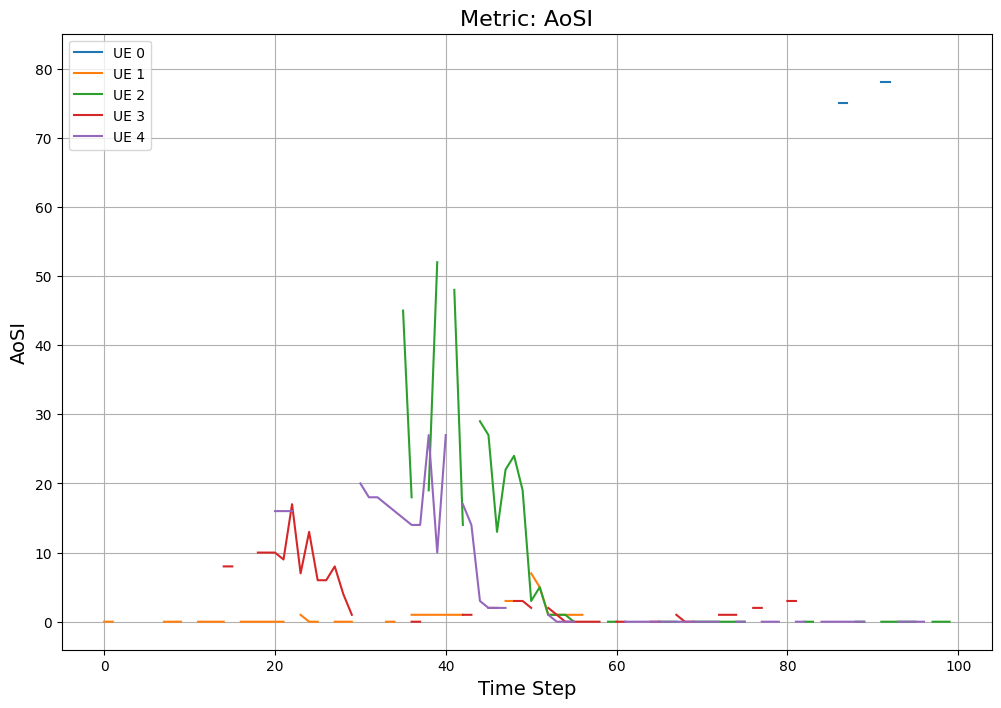

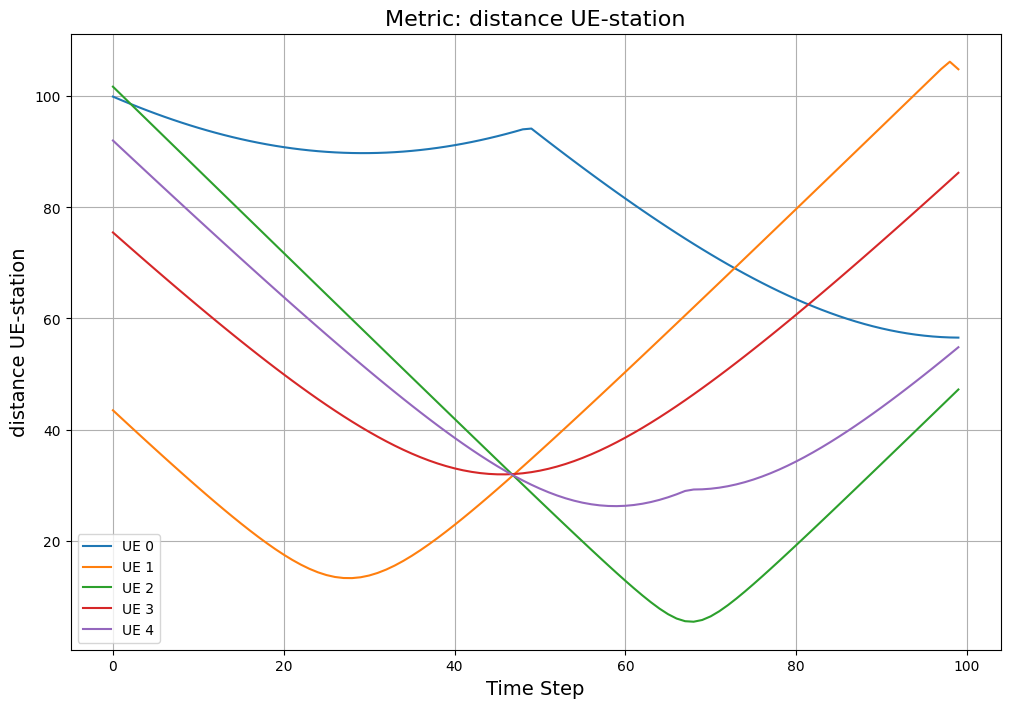

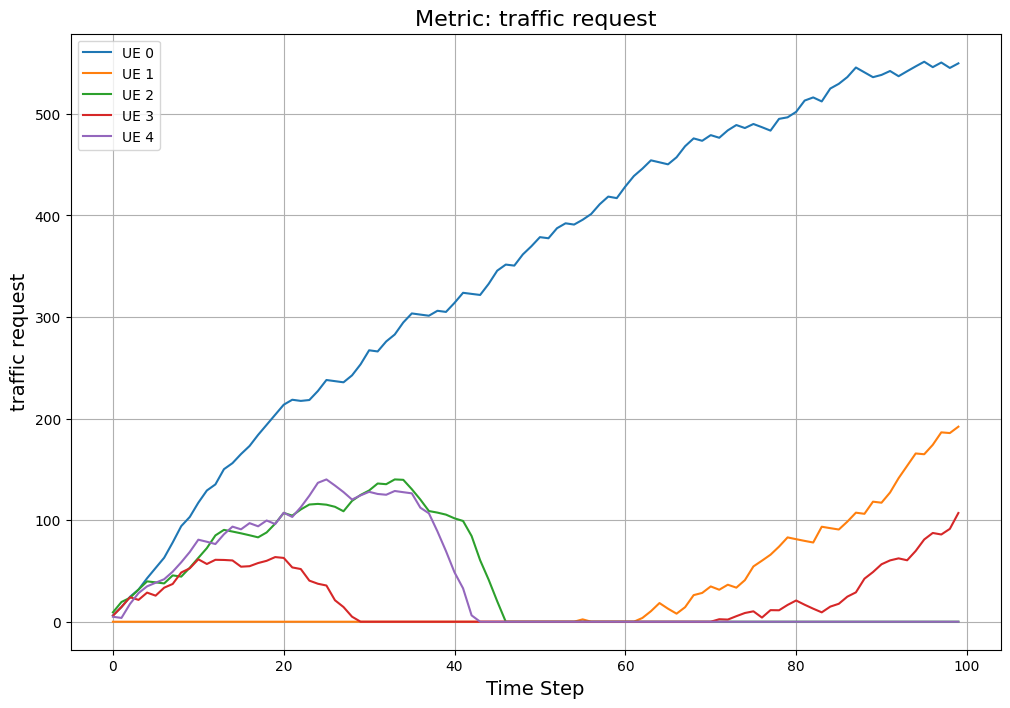

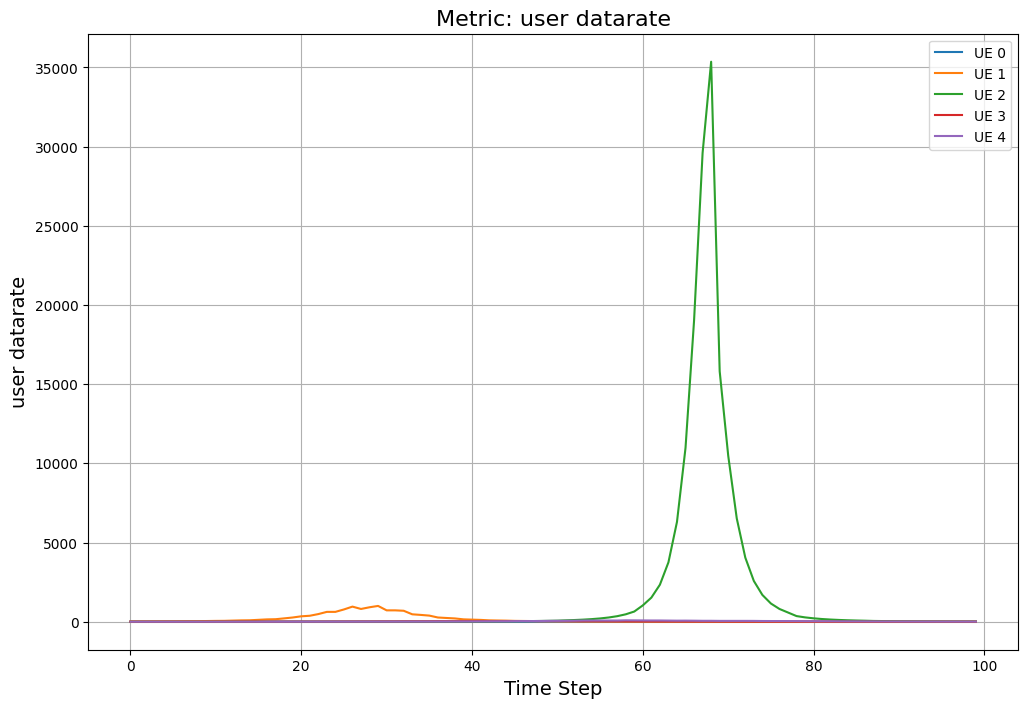

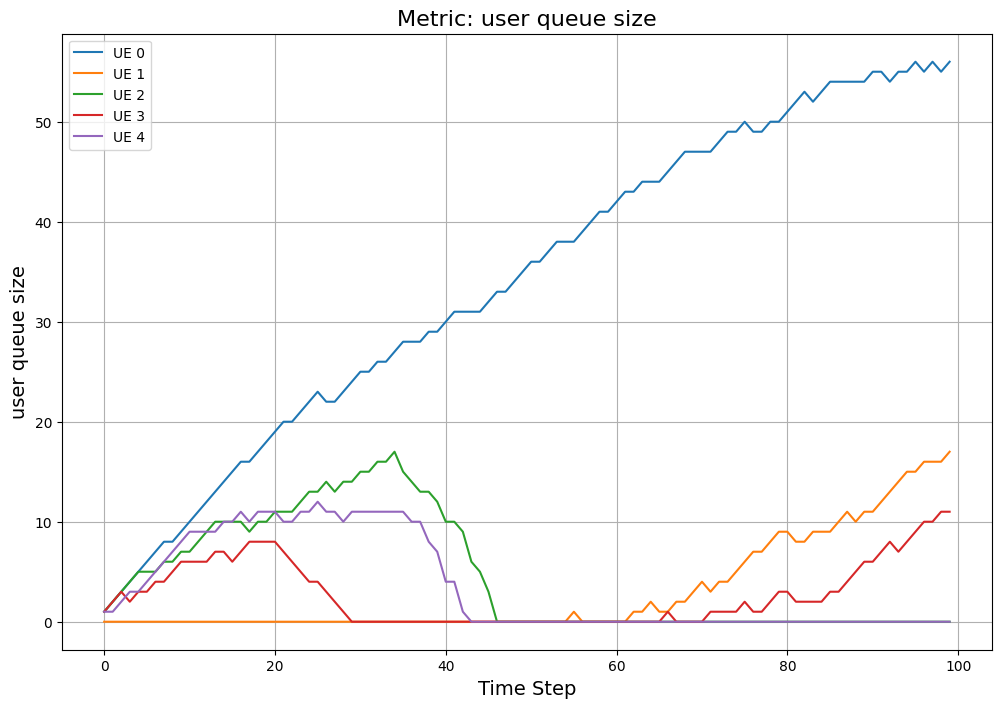

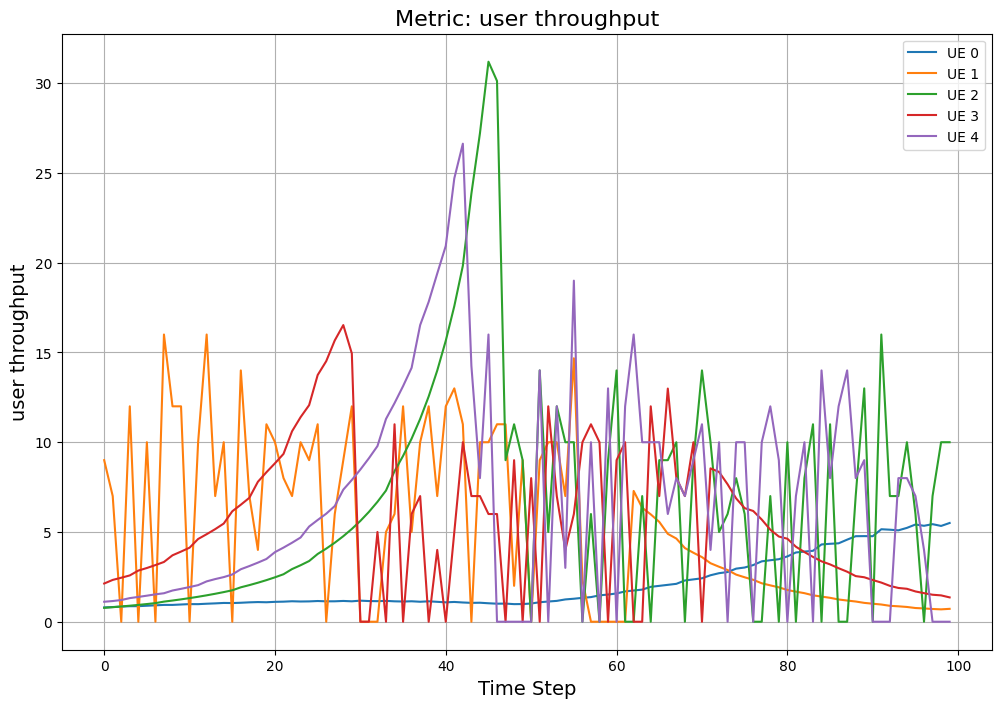

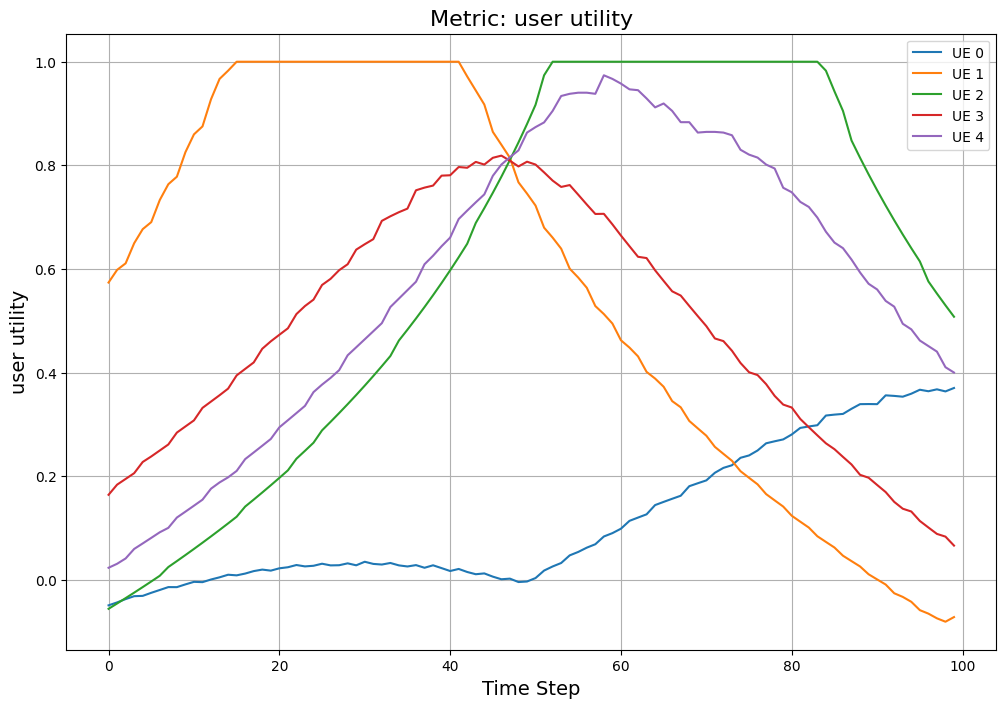

In [22]:
import matplotlib.pyplot as plt

def plot_all_ue_metrics(ue_results):
    for metric in ue_results.columns:
        plt.figure(figsize=(12, 8))
        
        for ue_id in ue_results.index.get_level_values("UE ID").unique():
            ue_data = ue_results.xs(ue_id, level="UE ID")[metric]
            plt.plot(ue_data.index, ue_data.values, label=f"UE {ue_id}")
        
        plt.title(f"Metric: {metric}", fontsize=16)
        plt.xlabel("Time Step", fontsize=14)
        plt.ylabel(metric, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

plot_all_ue_metrics(ue_results)

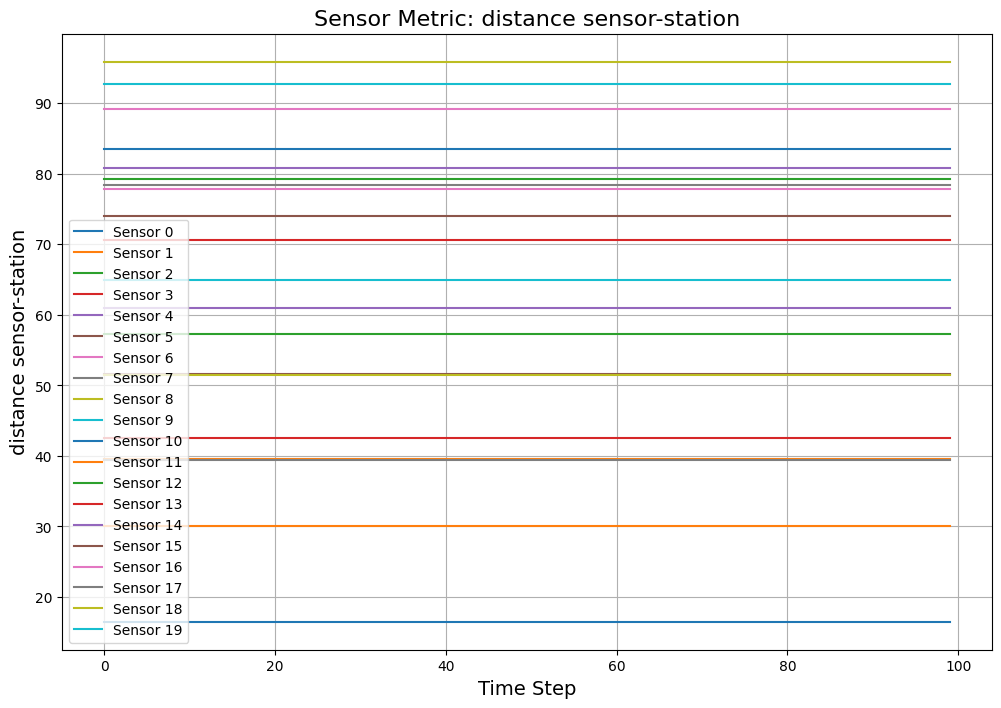

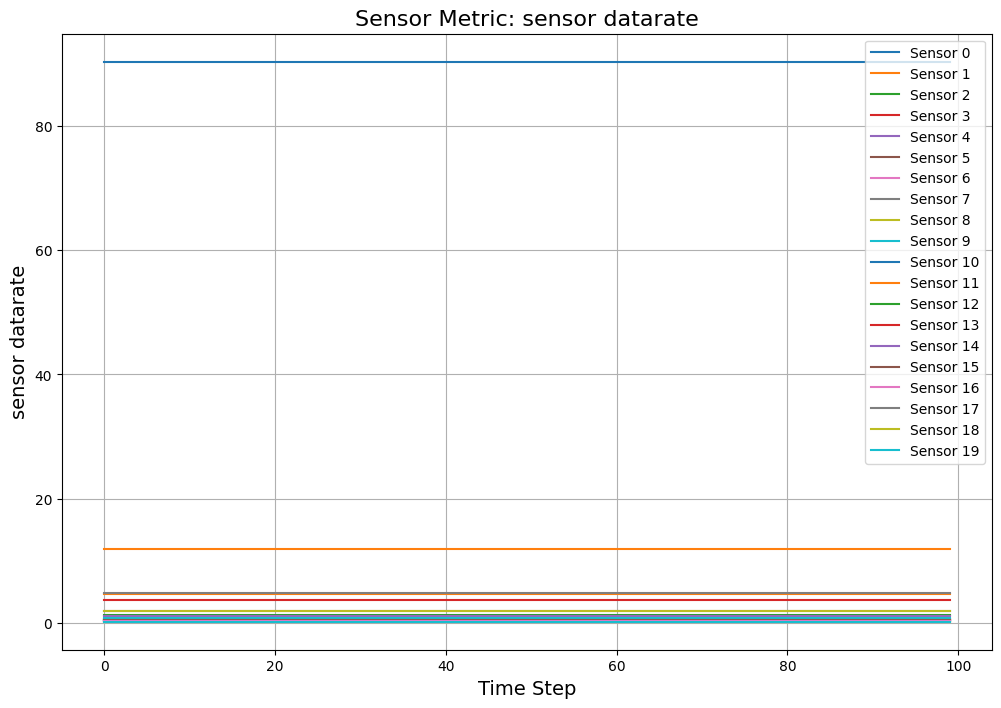

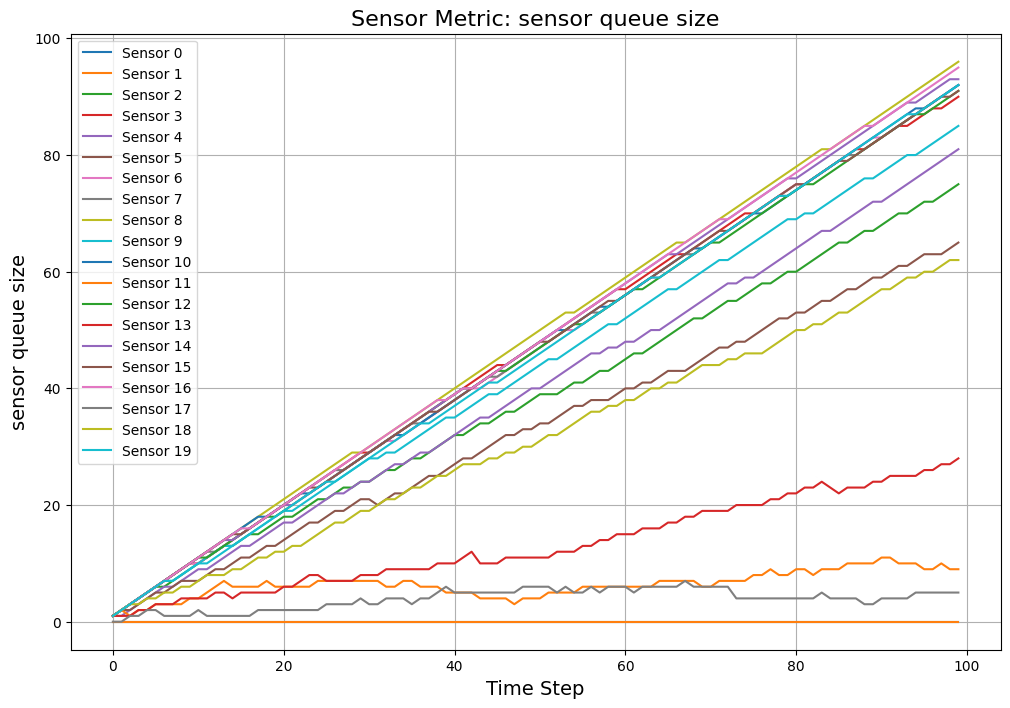

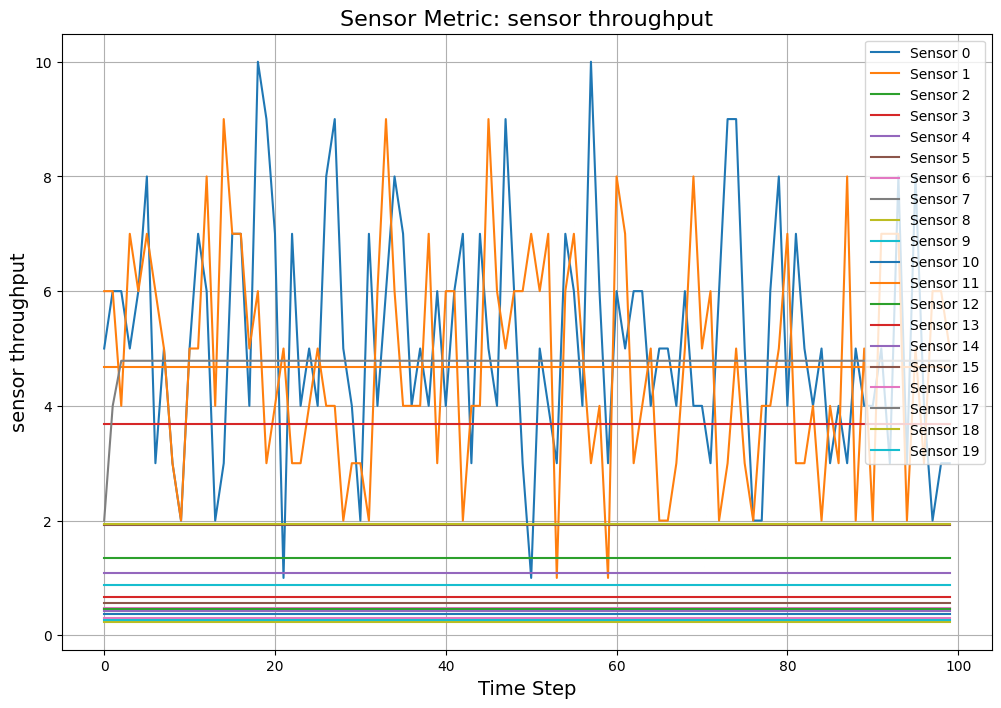

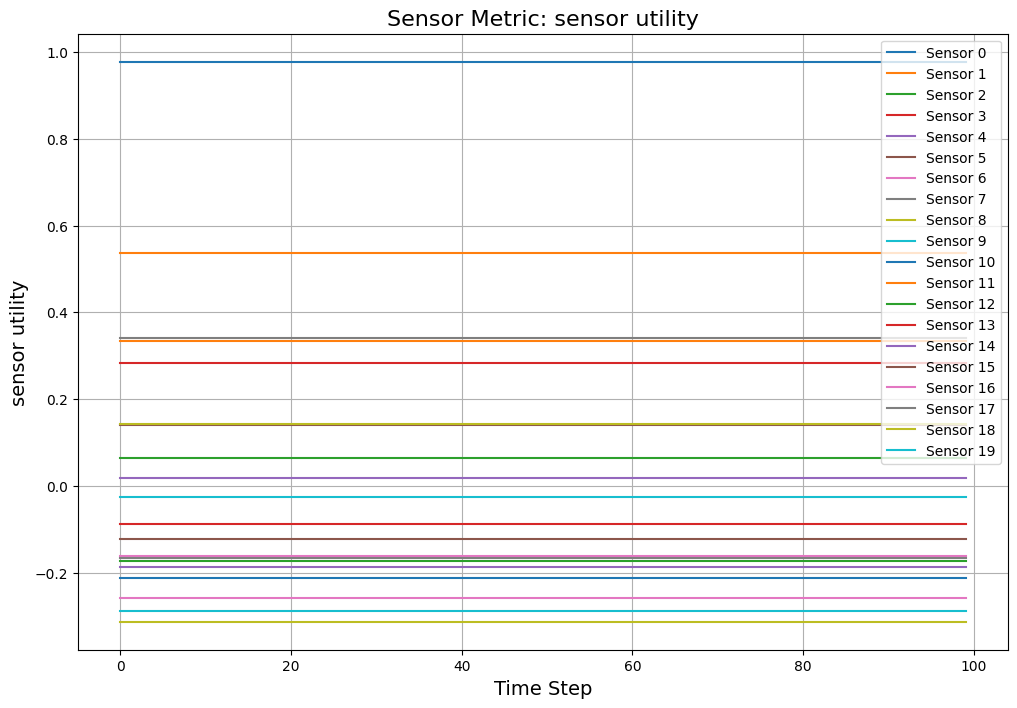

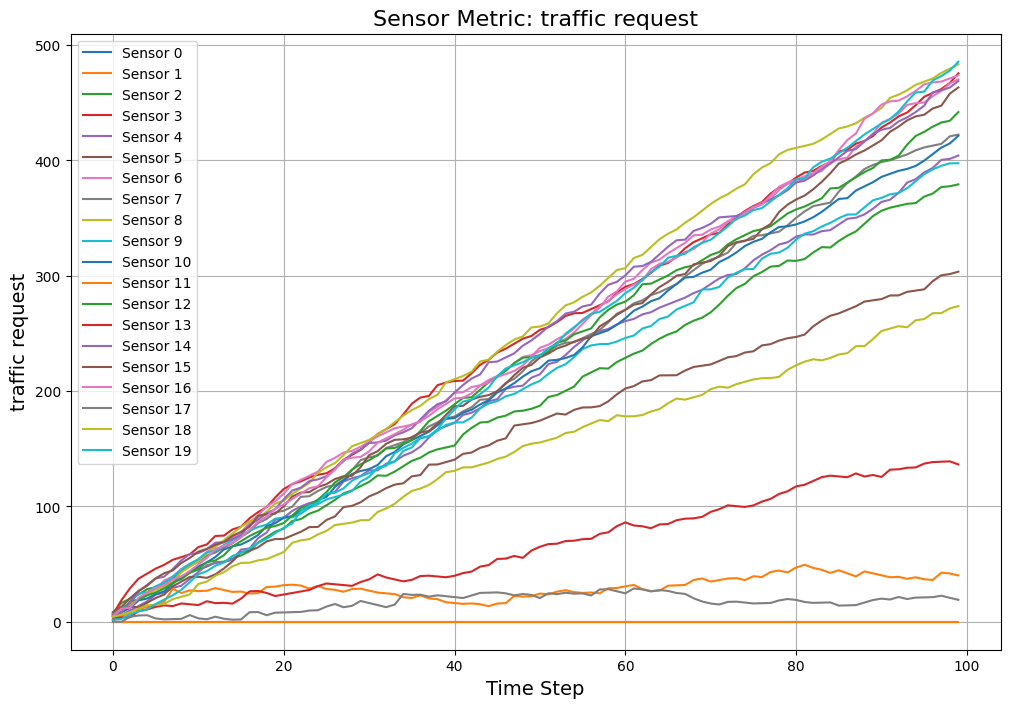

In [23]:
import matplotlib.pyplot as plt

def plot_all_sensor_metrics(ss_results):
    for metric in ss_results.columns:
        plt.figure(figsize=(12, 8))
    
        for sensor_id in ss_results.index.get_level_values("Sensor ID").unique():
            sensor_data = ss_results.xs(sensor_id, level="Sensor ID")[metric]
            plt.plot(sensor_data.index, sensor_data.values, label=f"Sensor {sensor_id}")
        
        plt.title(f"Sensor Metric: {metric}", fontsize=16)
        plt.xlabel("Time Step", fontsize=14)
        plt.ylabel(metric, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

plot_all_sensor_metrics(ss_results)